# Classification
## Predict customers likely to respond to a marketing campaign
### This notebook uses the *campaign.xlsx* dataset

## Work description

### Overview
We will assume the role of a consultant. You are asked to develop a prediction model in such a way that it will be possible for the Marketing Department of a retail company to predict which customers are likely to respond to a marketing campaign based on information from a previous campaign.</p>
<p>A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses.</p>

![](Project2_front_page.jpg "")

## [1. Business Understanding](#1.)

- ### [1.1. Background and Business objectives](#1.1.)


## [2. Data Understanding](#2.)
- ### [2.1. Dataset description](#2.1.)
- ### [2.2. Initializations and data loading](#2.2.)
- ### [2.3. Correlations](#2.3.)
- ### [2.4. Data Understanding Summary](#2.4.)


## [3. Data Preparation](#3.)
- ### [3.1 Make a copy of the original dataset](#3.1)
- ### [3.2 Checking duplicated lines](#3.2)
- ### [3.3 Set an Index](#3.3)
- ### [3.4 Missing Values Treatment ](#3.4)
- ### [3.5 Outliers ](#3.5)
- ### [3.6 Skewness ](#3.6)
- ### [3.7 Normalising Variables](#3.7)
- ### [3.8 Normalising Categorical Variables](#3.8)
- ### [3.9 Feature Engineering ](#3.9)
- ### [3.10 Coherence procedures](#3.10)


## [4. Classification Modeling](#4.)
- ### [4.1. Decision Tree](#4.1.)
- ### [4.1.1 Decision Tree Evaluation](#4.1.1.)
- ### [4.2 Support Vector Machine (SVM)](#4.2.)
- ### [4.2.1 Support Vector Machine (SVM) Evaluation](#4.2.1.)
- ### [4.3. K Neighbors](#4.3.)
- ### [4.3.1 K Neighbors Evaluation](#4.3.1.)
- ### [4.4 Neural Networks Model](#4.4.)
- ### [4.4.1 Neural Networks Model Evaluation](#4.4.1.)
- ### [4.5 Naïve Bayes Model](#4.5.)
- ### [4.5.1 Naïve Bayes Model Evaluation](#4.5.1.)
- ### [4.6 Logistic Regression](#4.6.)
- ### [4.6.1 Logistic Regression Evaluation](#4.6.1.)
- ### [4.6.2 Logistic  Regression with oversampling](#4.6.2.)
- ### [4.6.3 Logistic Regression with undersampling](#4.6.3.)
- ### [4.7 Random Forest](#4.7.)


## [5. Extras](#5.)
- ### [5.1. Bagging](#5.1.)
- ### [5.2. Comparison between Bagging and Random Forests](#5.2.)


## [6. Conclusion](#6.)

-----------------------------------

<a class="anchor" id="1.">
    
# 1. Business Understanding

To fundamentally understand the goal of this project it is important to get a proper understaniding of the business firsthand.

Marketing nowadays is, just as almost any other business area, significantly affected by data and algorithms. 
To make sound decisions in a marketing-related environment it is important to understand the power of proper data understanding and usage.

Features such as Income, Education and past campaign responsiveness will enhance a model to classify whether a prospect will respond to a makrketing campaign in the future. 

<a class="anchor" id="1.1.">

## 1.1 Background and business objectives

Throughout the implementation of this project, we followed the Crisp-DM Project Lifecycle - including the six phases of Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation & Deployment - in oder to assure good data quality and therefore a good predictive model to achieve the business objectives.

In Python different packages were being used for distinct functions:

• Pandas Package: Data Analysis (loading file, missing data, data understanding).

• NumPy Package: Mathematical functions to operate on arrays.

• Matplotlib Package: Data visualization.

• Seaborn Package: Statistical data visualization.

• Sklearn Package: For Scaling, Normalization and pairwise distances

• Category_encoders: A set of scikit-learn-style transformers for encoding categorical variables into 
numeric with different techniques.

• Scikit Learn SVM, KNeighborsClassifier and others: To develop the classification models and evaluate them.

• Besides "normal" weak models we also developed, ensembled and boosted techniques such as XGBoost.

<a class="anchor" id="2.">
    
# 2. Data Understanding

<a class="anchor" id="2.1.">

## 2.1 Dataset description

### Dataset Variables

- **AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise 
- **AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise 
- **AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise 
- **AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise 
- **AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise 
- **Response (target)** - 1 if customer accepted the offer in the last campaign, 0 otherwise 
- **Complain** - 1 if customer complained in the last 2 years
- **DtCustomer** - date of customer’s enrolment with the company
- **Education** - customer’s level of education
- **Marital** - customer’s marital status
- **Kidhome** - number of small children in customer’s household
- **Teenhome** - number of teenagers in customer’s household
- **Income** - customer’s yearly household income
- **MntFishProducts** - amount spent on fish products in the last 2 years
- **MntMeatProducts** - amount spent on meat products in the last 2 years
- **MntFruits** - amount spent on fruits products in the last 2 years
- **MntSweetProducts** - amount spent on sweet products in the last 2 years
- **MntWines** - amount spent on wine products in the last 2 years
- **MntGoldProds** - amount spent on gold products in the last 2 years
- **NumDealsPurchases** - number of purchases made with discount
- **NumCatalogPurchases** - number of purchases made using catalogue
- **NumStorePurchases** - number of purchases made directly in stores
- **NumWebPurchases** - number of purchases made through company’s web site
- **NumWebVisitsMonth** - number of visits to company’s web site in the last month
- **Recency** - number of days since the last purchase
- **ID** - custumer id number
- **Year_Birth** - Year of birth of the customer
- **Z_CostContact** - Cost per contact
- **Z_Revenue** - Revenue per contact

<a class="anchor" id="2.2.">

## 2.2 Initializations and data loading

In [226]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ROCAUC
import category_encoders as ce
import collections
from sklearn import svm
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [3]:
subPlots_Title_fontSize = 15
subPlots_xAxis_fontSize = 14
subPlots_yAxis_fontSize = 14
subPlots_label_fontSize = 14
heatmaps_text_fontSize = 10

plots_Title_fontSize = 16
plots_Title_textColour = 'black'

plots_Legend_fontSize = 14
plots_Legend_textColour = 'black'

In [4]:
# Loading the dataset and visualizing summary statistics
ds = pd.read_excel('campaign.xlsx', engine='openpyxl')
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,665,2012-08-31,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2237.0,NaN,NaN,NaN,303.838623,336.576209,0.0,24.0,173.0,504.0,1493.0


In [5]:
ds.shape

(2240, 29)

The dataset has 2240 rows of data and 29 variables , with 4 variables that have missing values. Dt_customer, Marital_Status, Education are categorcal variables. Income as a strange maximum value and MntSweetProducts has a realy high maximimum value ( deep dive on this variables ). The average Year_Birth is on 1968 and 49 days is the mean for recency, the value that divides the observations in half.  MntFishProducts has a -1 minimum value ( need to check this variable). Besides MntSweetProducts, MntWines has the hight average amount spent. 

In [6]:
# Show top rows
ds.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635.0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11.0,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426.0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11.0,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173.0,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520.0,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235.0,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76.0,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14.0,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28.0,...,20,1,0,0,0,0,0,3,11,0


First 10 rows of data gives a sample of the type of data that every variable has. 

In [7]:
#Check number of values
ds.count()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
Income                 2216
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2237
MntFruits              2238
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2187
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Complain               2240
Z_CostContact          2240
Z_Revenue              2240
Response               2240
dtype: int64

In [8]:
# Display info on the Type of variables
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2237 non-null   float64
 10  MntFruits            2238 non-null   float64
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2187 non-null   float64
 15  NumDealsPurchases    2240 non-null   i

In [9]:
#Checking for missing values - the number o missing values for each variable
print(ds.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                3
MntFruits               2
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds           53
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [10]:
# Check for missing values as a % of the total dataset for each variable
ds.isna().sum()/len(ds)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.133929
MntFruits              0.089286
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           2.366071
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [11]:
#Check how many times value 0 and 1 appear on Response

from collections import Counter
Response=ds['Response']
Response_counts = Counter(Response)

print(f'"0" appears {Response_counts[0]} time(s)')

from collections import Counter
Response=ds['Response']
Response_counts = Counter(Response)

print(f'"1" appears {Response_counts[1]} time(s)')

"0" appears 1906 time(s)
"1" appears 334 time(s)


In [12]:
# Check for duplicates - 
ds.duplicated().sum()

0

### Histograms on all numeric variables to check distribution

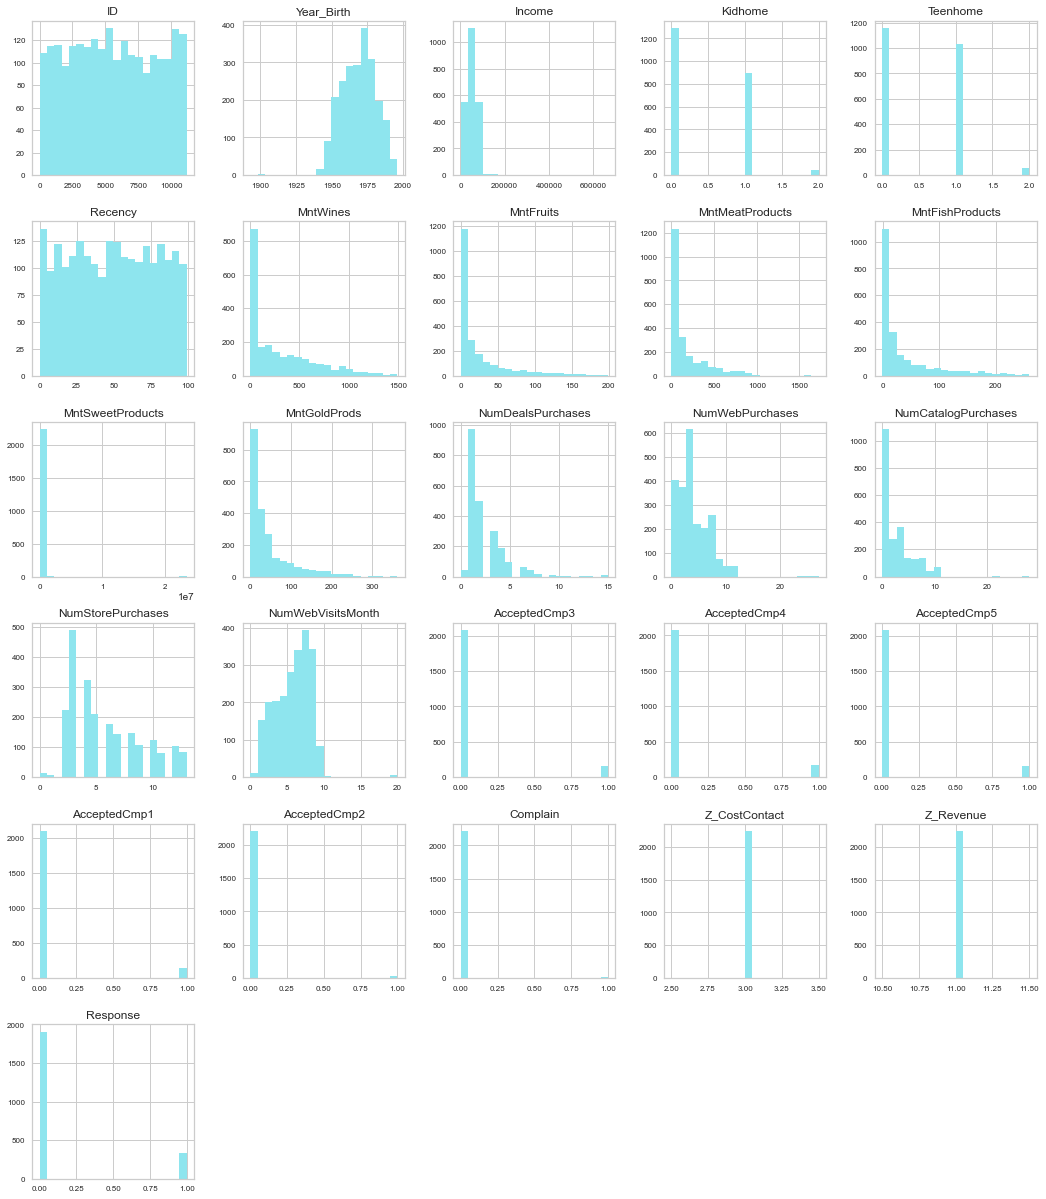

In [13]:
numerical=ds.select_dtypes(include=[np.number]).columns.tolist()
ds[numerical].hist(bins=20, figsize=(18, 25), layout=(7, 5), xlabelsize=8, color ='#8EE5EE', ylabelsize=8);

Skew = 0 - Normal Distribution; Skew < 0 - Negative/Left Skewness - if we have outliers they will most likely be on the left side and the right side will have more observations; Skew > 0 - Positive/Right Skewness - if we have outliers they will most likely be on the right side and the left side will have more observations.

ID and Recency show aparenttly symmetric distributions or uniform distributions. Year_birth with distribution with a simetric shape with a left/negative low skew. Most of the ammount variables have a right skew shape.


### Boxplots to check outliers

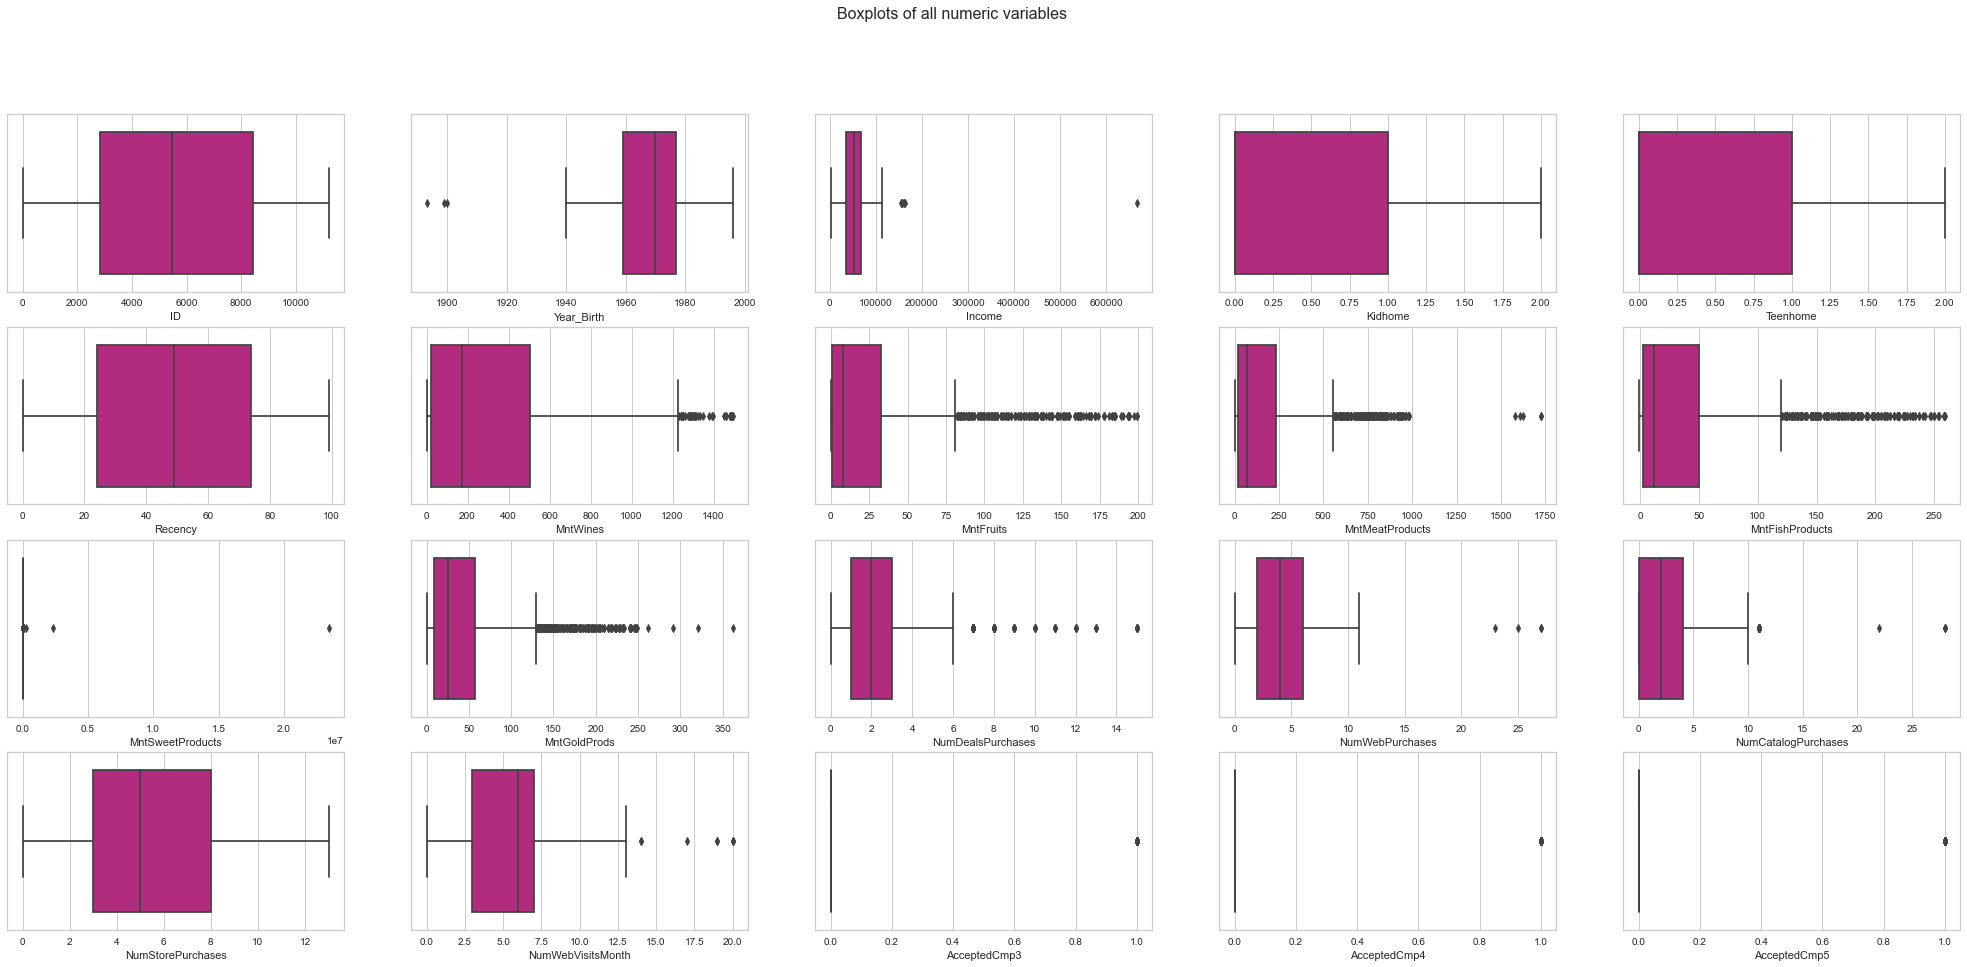

In [14]:
numerical=ds.select_dtypes(include = [np.number]).columns.tolist()

fig, ax = plt.subplots(4, 5, figsize = (35,15))
for var, subplot in zip(ds[numerical], ax.flatten()):
    g = sns.boxplot(data = ds,
                 x = var,
                 color = '#C71585',
                 ax = subplot)

plt.rc('axes', labelsize = subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);

### The above boxplot graphs show outliers on the following variables: 

- Income
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds
- NumDealsPurchases
- NumWebPurchases
- NumcatalogPurchases
- NumWebPurchases
- Accepted Campaign 1-5 are categorical variables and hence not having outliers

<a class="anchor" id="2.3.">

## 2.3. Correlations

### Spearman correlation matrix 

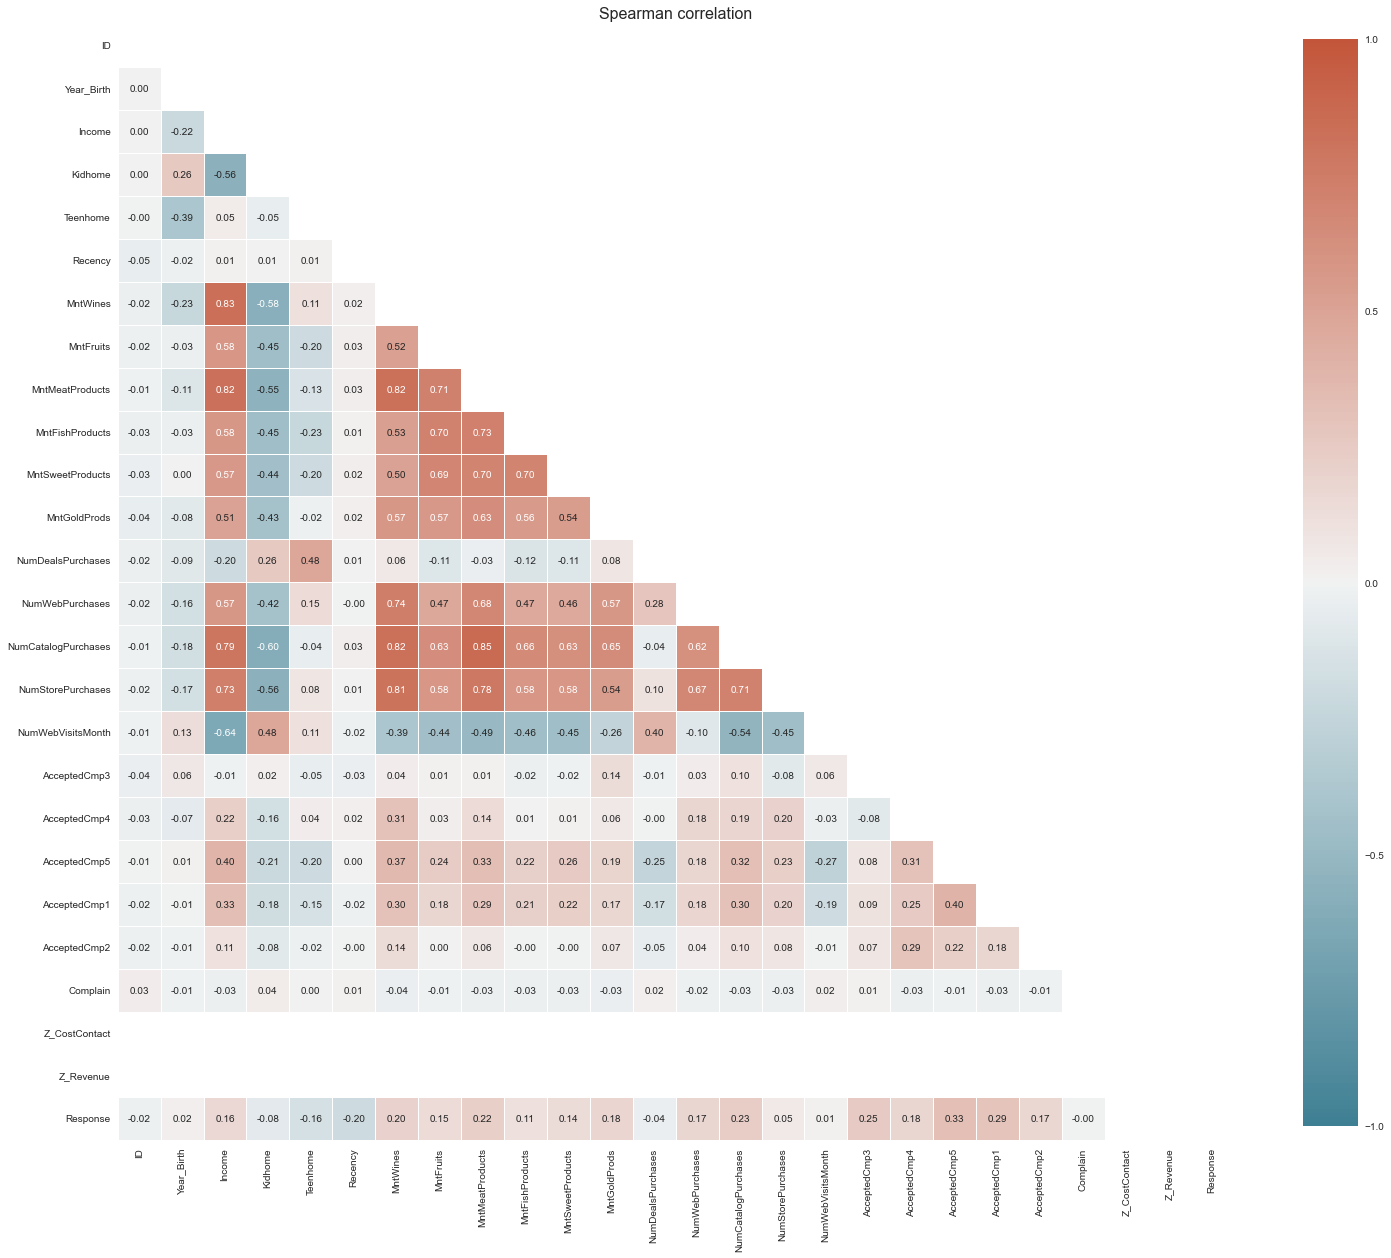

In [15]:
corr = ds.corr(method = 'spearman')
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

#Draw
cmap = sns.diverging_palette(220, 20, as_cmap = True) #aqui da para mudar a cor
fig , ax = plt.subplots(figsize = (25, 50))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = cmap,
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      fmt = '.2f',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': heatmaps_text_fontSize})
                      

#Decoration
plt.title("Spearman correlation", fontsize = plots_Title_fontSize)
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 90)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [16]:
# Create a table list with the correlations storted to help identify the extreme values

# Create correlation matrix
corr_mat = ds.corr(method='spearman')
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)

NumWebVisitsMonth    Income            -0.643667
NumCatalogPurchases  Kidhome           -0.597518
MntWines             Kidhome           -0.579812
Kidhome              Income            -0.559909
NumStorePurchases    Kidhome           -0.556584
                                          ...   
MntMeatProducts      Income             0.816815
                     MntWines           0.823460
NumCatalogPurchases  MntWines           0.823764
MntWines             Income             0.829875
NumCatalogPurchases  MntMeatProducts    0.851660
Length: 276, dtype: float64


/var/folders/3r/2t4mdrb11dg2j122_tljy3ph0000gn/T/ipykernel_4206/1027480128.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))


### Pairplot MntMeatProducts and NumCatalogPurchases because of correlation of 0.85 from correlation matrix

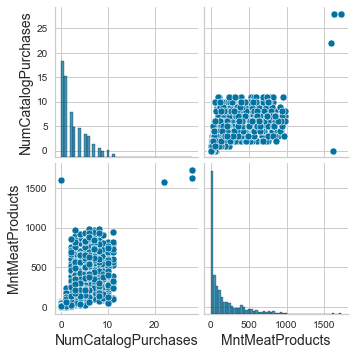

In [17]:
sns.pairplot(data=ds, vars= ['NumCatalogPurchases', 'MntMeatProducts'])

### Pairplot MntMeatWines and Income because of correlation of 0.83 from correlation matrix

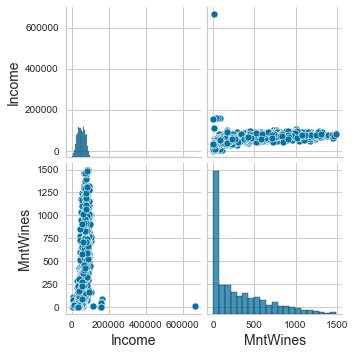

In [18]:
sns.pairplot(data=ds, vars= ['Income', 'MntWines'])

### Pairplot Numwebvisitsmonth and Income because of correlation of -.64 from correlation matrix ( a negative exemple)

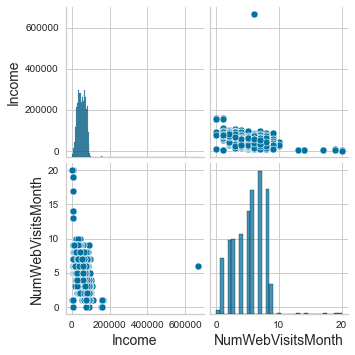

In [19]:
sns.pairplot(data=ds, vars= ['Income', 'NumWebVisitsMonth'])

<a class="anchor" id="2.4.">

## 2.4 Data Understanding Summary

The dataset has 2240 observations and 29 features with 3 categorical and 26 numerical variables that have no duplicated data.
After performing the data expeloration and desciptive analysis through statistical summaries on the numerical data, we analysed the minimum values with the 25 percentile as well as the maximum values combined with the 75 percentile. These procedures combined with the data vizualizations gave us the following information:

- 'ID' is a numerical value with no repeated values.


- 'Year_Birth' is a numerical value. The mean is around 1968.8 The minimum value is 1893, and this could indicate that there could exist some outliers. This customer would be 129 years old and since the oldest person ever alive was 122 we can be sure this must be an error in the data . All other custumers in the dataset are above 25/26 years old. The year 1976 is the year with the highest number of births ( 89 ). The year having 50% of the observations is 1970. It follows a normal distribution with a symmetric shape with a left/negative low skew value.


- 'Education and Marital' are categorical variables. Regarding Education, we have 5 unique values with "Graduation" level and the top with 1127 customers "graduated".


- The dataset has 864 married customers. 'Marital' status has 8 unique variables, but some statuses are not correct or may need to be transformed. For exemple "Absurd" or "Yolo" with 2 observations each are obviously not a maritial status. The status 'Alone' can be joined with either single or divorced.


- 'Income' has 2216 observations and hence 24 missing values. Annual household income mean is around 52k. The maximum value is 666k ( most likely an outlier ) and the minimum value 1730. The standard deviation near to 25K might sugest that the household income in the dataset might probably not be gaussian distributed. Thus this shows a higly skewed distribution due to the possible outliers.


- 'Kidhome' and 'Teenhome' are numerical variables. The miminum value is 0 children ( kids and teens ) at home. The maximum value is 2 kids or 2 teens at home. The mean value is around 0.44 kids at home and 0.5 teens. In the dataset there is no customer with 4 children living at home. These variables show a moderate ( kidhome) and symmetric skewness ( Teen ).


- 'Dt_Customer' is the date of customer’s enrollment with the company. The 31/08/20212 is the day with the highest number of new customers (12). All customers were generated between 2012 and 2014 with the excpetion of 2 outliers (customers with errors: date in 2041 and 2042).


- 'Recency' is a numerical variable with a mean of 49.1 (days) since the last purchase. It ranges from 0 days to 99 days and the distribution between the quartiles follows the intervals with 24 days in the first quartile, 49 days in the second and 74 days in the third. It almost follows a uniform distribution.


- Custumers average spent over the last 2: 303 on wines, fruits 26 , meat 166 , fish 37 and gold 44. Sweets 11.634 but this value is higly impacted ( sensitive ) by 3 outliers values. All amounts of spent variables show some degree of data disperson just by looking at the standard deviation with high values.


- Regarding the amounts spent in the last 2 years, we are having some customers that did not buy any product ( 0 in the amout spent / missing values) in the categories Wines, Fruits and Gold. Fish products have 2 negative vales of -1 , possibly a return or error. Sweet products have a maximum amount of 23.423.444 which is likely to reveal the existence of outliers. The boxplots also show several outliers on the all amount spent variables. Most of these variables show a right ( positive ) higly skewed distribution captured by the histograms.


- 'NumDealsPurchases' is a numerical value that follows a Log Normal distribution. The mean is 2.3 deal purchases and the mode 1 ( positive skewness ). There are 46 customers that did not buy on promotions and 970 with at least 1 purchase on promotions. 7 Custumers bought 15 times on promotions.   	


- Regarding the shopping habits, customers purchase 'online' has an average of 4.08, 2.6 on catalog and in store 5.7. All purchase variables are positive skewed but the 'store purchases' has the lowest skewness value among the 3. Here we only have very few outliers.


- The 'NumWebVisitsMonth' has an average of 5.3 with a symmetric distibution ( very low positive skewness). Looking at the distribution and the boxplot we observe some possible outliers with visits to the site above 13.


- The 'acceptedcmp' attributes are binary variables with 1 meaning that the customer accepted the campaign, and 0 that the customer did not accepted. Campaign2 has the lowest accpeted result with an average of 0.013. Only 30 customers accepted the campaign. Other campaings generated on average between 144 and 167 customers out of the 2240.


- 'Response' is the target variable and binary with 334 customers accepting the campaign in the last 2 years with an average of 0.14 accepted campaigns("yes") per custumer. It is positively skewed since the mode is still 0 and but the mean is positive and higher compared to previous campaings.


- The 'complain' variable is also binary and shows that only 21 of the customers complained over the last 2 years with an average of 0.009 complainns per custumers. Like 'acceptedcmp' and ' Response', this variable is positively skewed since thr mode is 0 and the mean is positive, but low though.


- 'Z_CostContact' and 'Z_Revenue' are numerical variables that with just one constant value each. 3 for cost and 11 for revenue. 


- The correlations, visualized through a heatmap apllying the spearman correlation coefficient, we concluded that the 'NumCatalogPurchases' and 'MntMeatProducts´ are highly positively correlated ( 0.85 ) ,  followed by 'MntWines' and 'Income'(0.83). 'Income' and 'Numwebvisitsmonth' are negatively correlated ( -0.64) followed by ´Kidhome' and 'NumCatalogPurchases' (-.60 ).


- In conclusion, the variables 'NumCatalogPurchases' and 'MntMeatProducts' are somewhat correlated with 0.72 value followed by 'NumStorePurchases' and 'MntWines'  with 0.64. The highest negtive correlaction is between 'NumCatalogPurchases' and  'MntMeatProducts'. Since they are below 0.8, we need to check if we can remove any of them or transform the variable.

<a class="anchor" id="3.">

# 3. Data Preparation

After performing Data Understanding this Project will step up to the Data Preparation phase. In this phase, we are going to perform some useful commands as preprocessing tasks to prepare and clean the dataset. After this data preparation we will be able to better approach the clean data.

Following steps:

- Make copies of the original dataset;

- Check and remove duplicated Data;

- Coherence procedures and Missing Values

- Outliers and Skewness;

- Replace values and Data Cleaning;

- Normalizing and Feature Engineering

<a class="anchor" id="3.1">

## 3.1 Make a copy of the original dataset

In [20]:
#Do a copy of the dataset to proceed with the data transformation
ds1 = ds.copy(deep=True)
ds1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635.0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11.0,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426.0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11.0,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173.0,...,5,0,0,0,0,0,0,3,11,0


<a class="anchor" id="3.2">
    
## 3.2 Checking duplicated lines

In [21]:
# Check duplicated lines
ds1[ds1.duplicated(keep=False)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [22]:
ds1["Z_CostContact"].head(30)

0     3
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
20    3
21    3
22    3
23    3
24    3
25    3
26    3
27    3
28    3
29    3
Name: Z_CostContact, dtype: int64

In [23]:
ds1["Z_Revenue"].head(30)

0     11
1     11
2     11
3     11
4     11
5     11
6     11
7     11
8     11
9     11
10    11
11    11
12    11
13    11
14    11
15    11
16    11
17    11
18    11
19    11
20    11
21    11
22    11
23    11
24    11
25    11
26    11
27    11
28    11
29    11
Name: Z_Revenue, dtype: int64

In [24]:
# Drop Z_CostContact and Z_Revenue since these constants do not add any value to the model 
del ds1['Z_Revenue']
del ds1['Z_CostContact']
ds1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635.0,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11.0,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426.0,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11.0,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173.0,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709.0,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406.0,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908.0,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428.0,...,5,10,3,0,0,0,0,0,0,0


<a class="anchor" id="3.3">
    
## 3.3 Set an Index

In [25]:
 #set the ID as index

ds1 = ds1.set_index('ID')
ds1.head(15)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635.0,88.0,...,10,4,7,0,0,0,0,0,0,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11.0,1.0,...,1,2,5,0,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426.0,49.0,...,2,10,4,0,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11.0,4.0,...,0,4,6,0,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173.0,43.0,...,3,6,5,0,0,0,0,0,0,0
7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520.0,42.0,...,4,10,6,0,0,0,0,0,0,0
965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235.0,65.0,...,3,7,6,0,0,0,0,0,0,0
6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76.0,10.0,...,0,4,8,0,0,0,0,0,0,0
4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14.0,0.0,...,0,2,9,0,0,0,0,0,0,1


<a class="anchor" id="3.4">
    
## 3.4 Missing Values Treatment

In [26]:
#Check Missing values- create table
def missing_values_table(x):
        mv = x.isna().sum()
        mv_pct = 100 * x.isna().sum() / len(x)
        mv_table = pd.concat([mv, mv_pct], axis=1)
        mv_table = mv_table.rename(
        columns = {0: 'Nº of Missing Values', 1: '% of Missing Values'})
        mv_table = mv_table[
            mv_table.iloc[:,1] != 0].sort_values(
        '% of Missing Values', ascending=False).round(1)
        return mv_table

missing_values_table(ds1)

,Nº of Missing Values,% of Missing Values
MntGoldProds,53,2.4
Income,24,1.1
MntWines,3,0.1
MntFruits,2,0.1


In [27]:
# Replace MntGoldProds, Income, MntWines, MntFruits missing values by median
X= ds1.fillna(ds1.median(numeric_only=True))
X.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [28]:
# Display info
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   float64
 9   MntFruits            2240 non-null   float64
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   float64
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

In [29]:
# Check counts of categorical variables Marital_Status
cols = ['Marital_Status']
X[cols].apply(pd.Series.value_counts)

,Marital_Status
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [30]:
#remove the YOLO, Absurd and Alone from Marital Status 

X = X.drop(X.index[X['Marital_Status'].isin(['YOLO','Absurd','Alone'])])
X.shape


(2233, 26)

We removed 7 rows from the dataset

In [31]:
# Transform actual categorical values that are currently listed as an integer to a categorical value

cols= ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']
X[cols] = X[cols].apply(lambda x:x.astype('category'))

<a class="anchor" id="3.5">
    
## 3.5 Outliers

In [32]:
#Check how many times value 0 appears in MntSweetProducts

from collections import Counter
MntSweetProducts=X['MntSweetProducts']
MntSweetProducts_counts = Counter(MntSweetProducts)

print(f'" 0" appears {MntSweetProducts_counts[0]} time(s)')

" 0" appears 418 time(s)


In [33]:
#Check how many times MntSweetProducts is higher than 263

details = ds1.apply(lambda x : True
            if x['MntSweetProducts'] > 263 else False, axis = 1)
  
# Count number of True in the series
num_rows = len(details[details == True].index)
  
print('Number of Rows in dataframe in which MntSweetProducts is higher than 263: ',
      num_rows )

Number of Rows in dataframe in which MntSweetProducts is higher than 263:  3


### Boxplots to check outliers

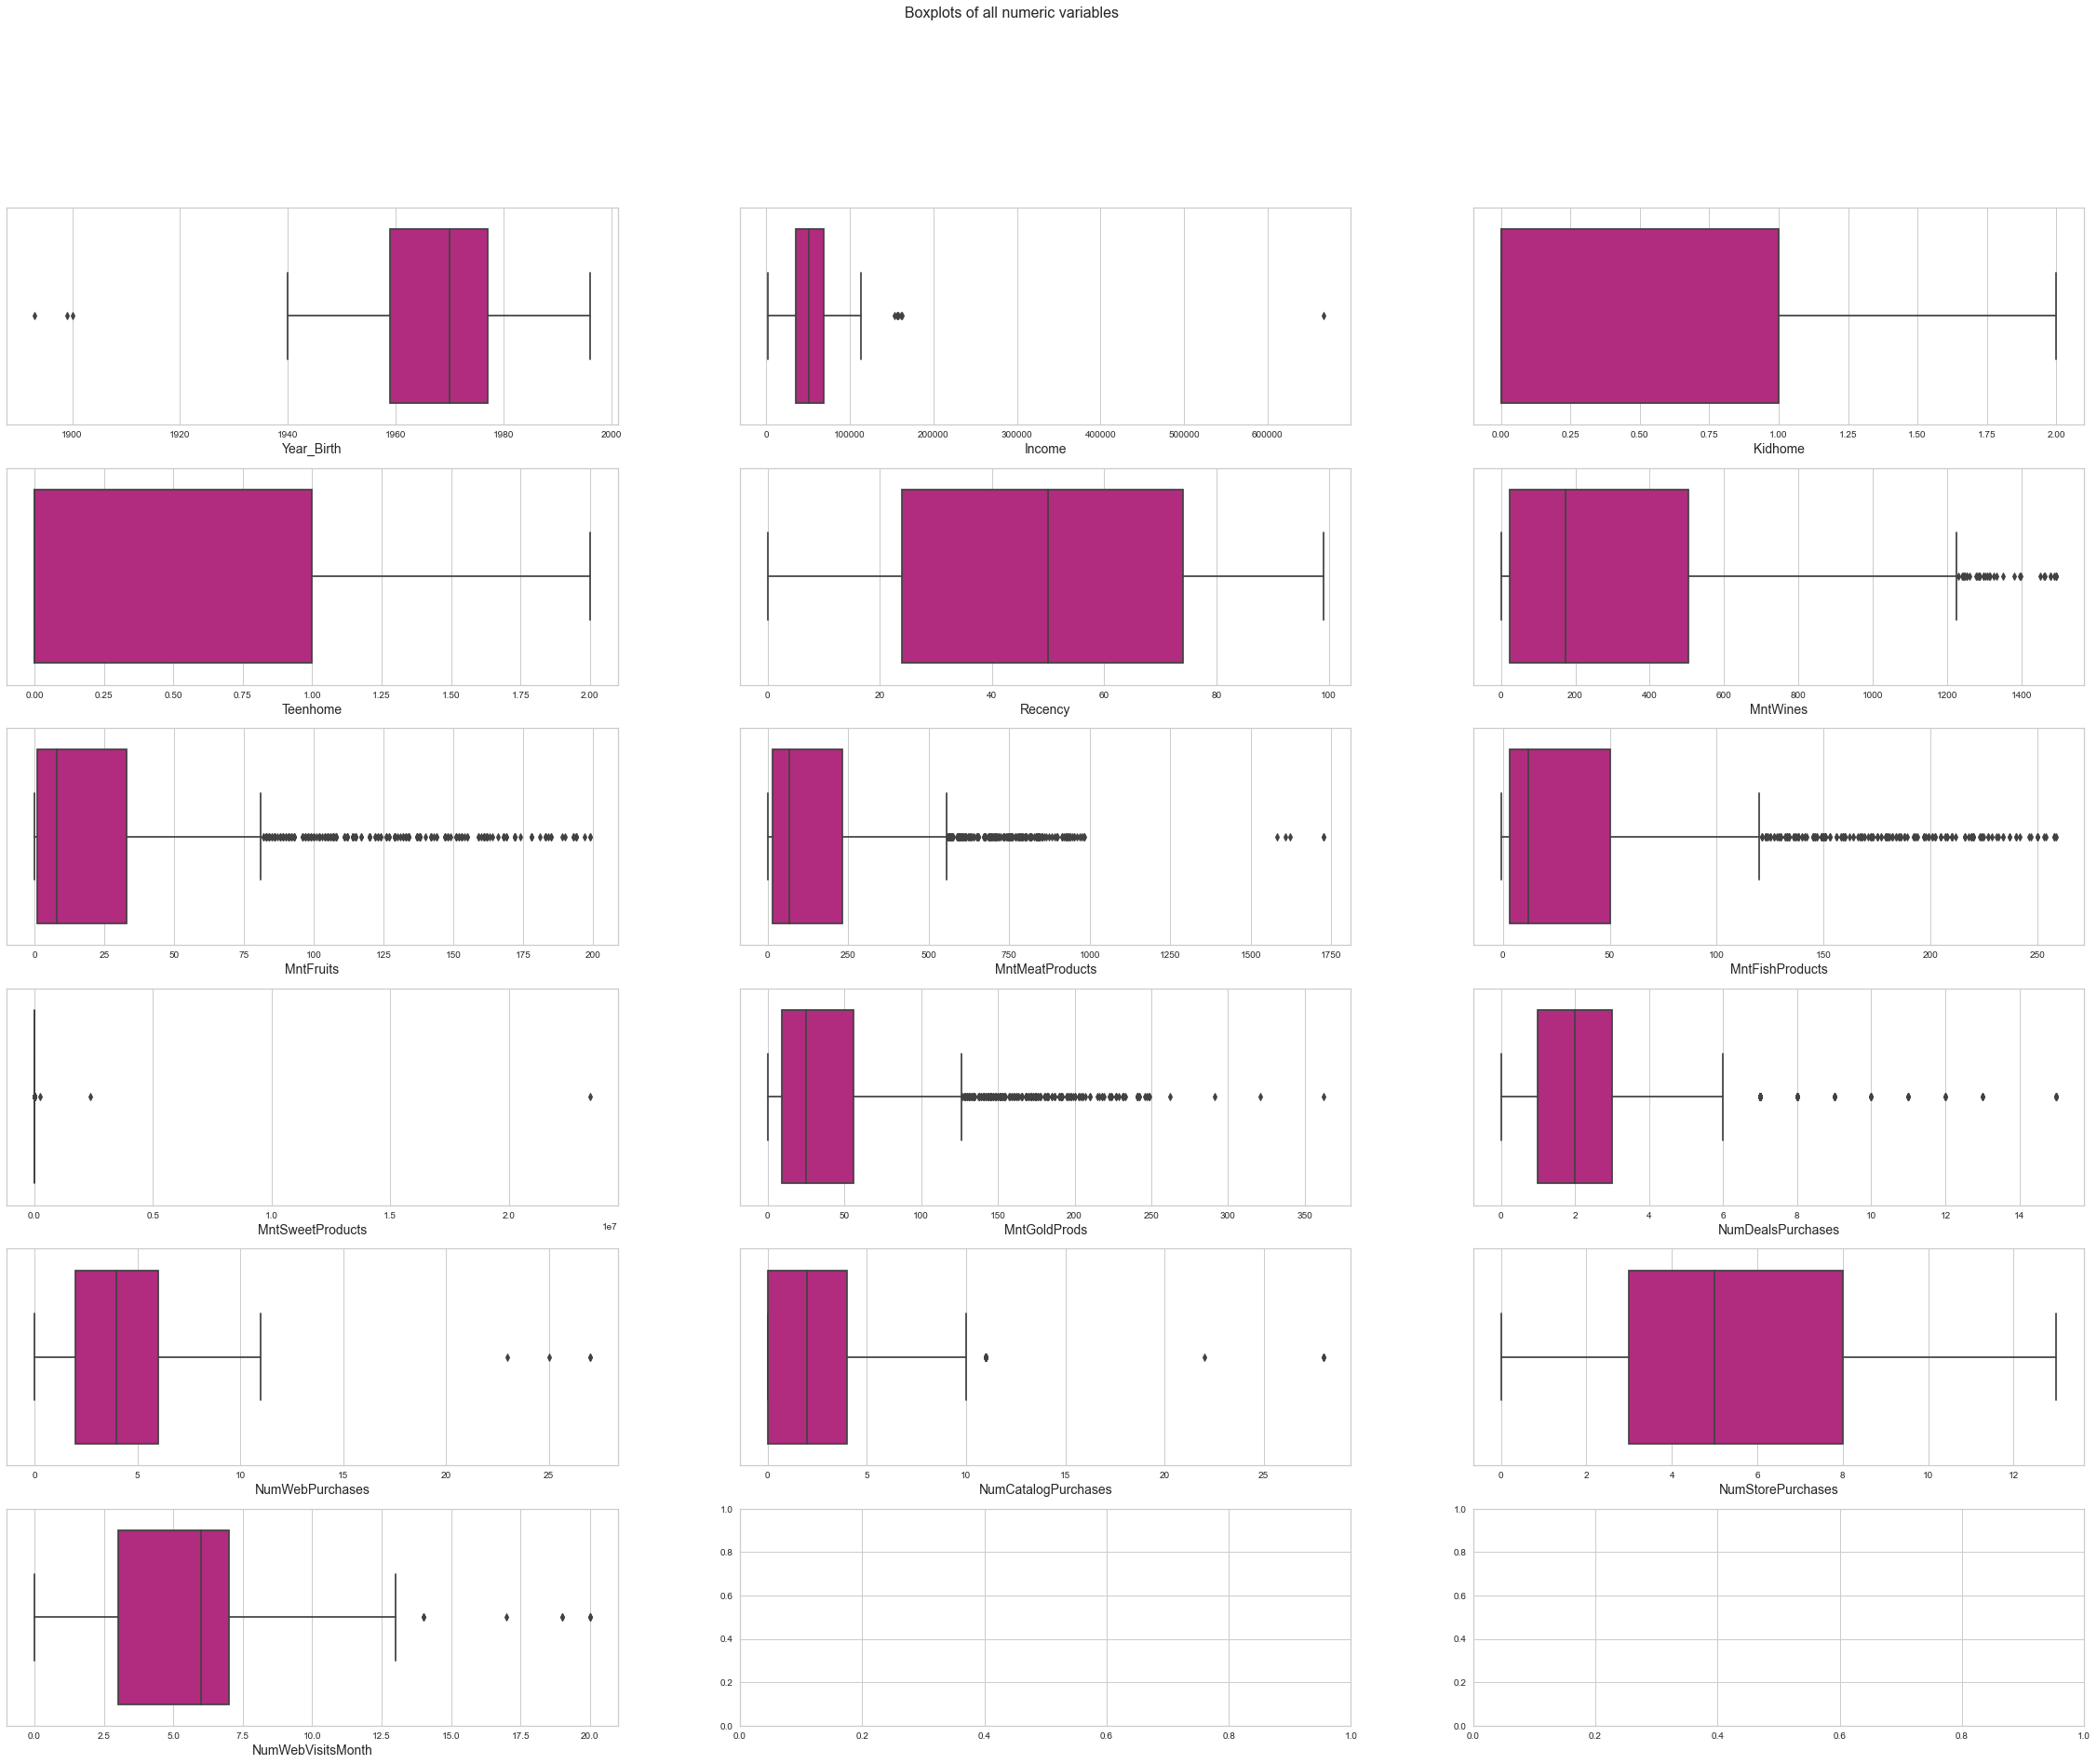

In [34]:
numerical=X.select_dtypes(include = [np.number]).columns.tolist()

fig, ax = plt.subplots(6, 3, figsize = (40,30))
for var, subplot in zip(X[numerical], ax.flatten()):
    g = sns.boxplot(data = X,
                 x = var,
                 color = '#C71585',
                 ax = subplot)

plt.rc('axes', labelsize = subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);

In [35]:
#Checking skewness and kurtosis
X.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Year_Birth,-0.352560,0.722220
Income,6.802073,161.267079
Kidhome,0.636075,-0.777430
Teenhome,0.408957,-0.983534
Recency,-0.003940,-1.203154
MntWines,1.178437,0.602751
MntFruits,2.109064,4.092858
MntMeatProducts,2.082323,5.511593
MntFishProducts,1.922006,3.119978
MntSweetProducts,46.593612,2188.722954


### Year_Birth

### Check the distribution of the variable Year_Birth for outliers

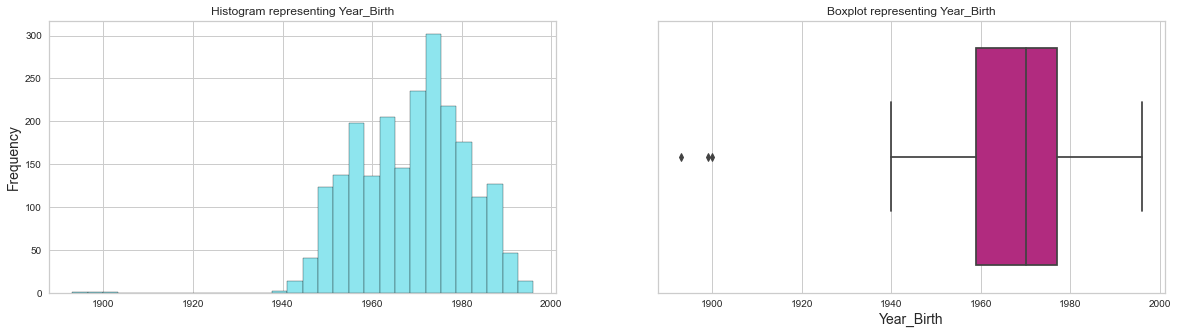

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["Year_Birth"], data=X, color = '#C71585',ax = ax[1])
X["Year_Birth"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'Year_Birth', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing Year_Birth')
ax[0].title.set_text('Histogram representing Year_Birth')

In [37]:
#Remove Outliers
outliers = X[(X.Year_Birth <1910)].copy()
X = X[(X.Year_Birth >1910 ) | (X.Year_Birth.isnull())]

In [38]:
#Check how much data was deleted
print("We deleted " + str(2240 - X.shape[0]) + " observations from the X dataset, that is " + str(((2240 - X.shape[0])/2240)*100) + "% of the observations.")

We deleted 10 observations from the X dataset, that is 0.4464285714285714% of the observations.


### Re-Check Distribution

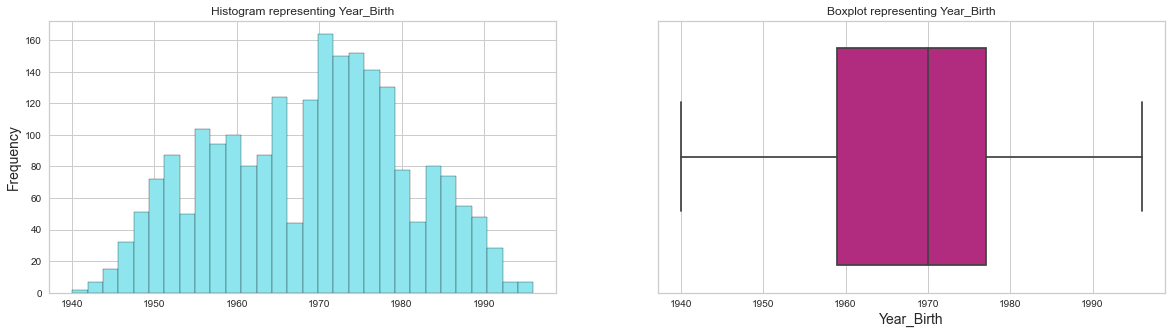

In [39]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["Year_Birth"], data=X, color = '#C71585',ax = ax[1])
X["Year_Birth"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'Year_Birth', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing Year_Birth')
ax[0].title.set_text('Histogram representing Year_Birth')

### Income

### Check the distribution of the variable Income for outliers

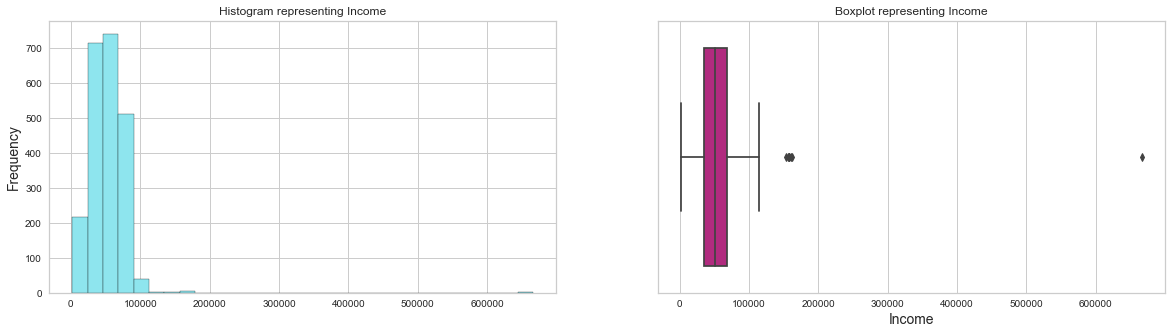

In [40]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["Income"], data=X, color = '#C71585',ax = ax[1])
X["Income"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'Income', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing Income')
ax[0].title.set_text('Histogram representing Income')

In [41]:
#Remove Outliers
outliers = X[(X.Income >150000)].copy()
X = X[(X.Income <150000 ) | (X.Income.isnull())]

In [42]:
#Check how much data was deleted
print("We deleted " + str(2240 - X.shape[0]) + " observations from the X dataset, that is " + str(((2240 - X.shape[0])/2240)*100) + "% of the observations.")

We deleted 18 observations from the X dataset, that is 0.8035714285714285% of the observations.


### Re-Check Distribution

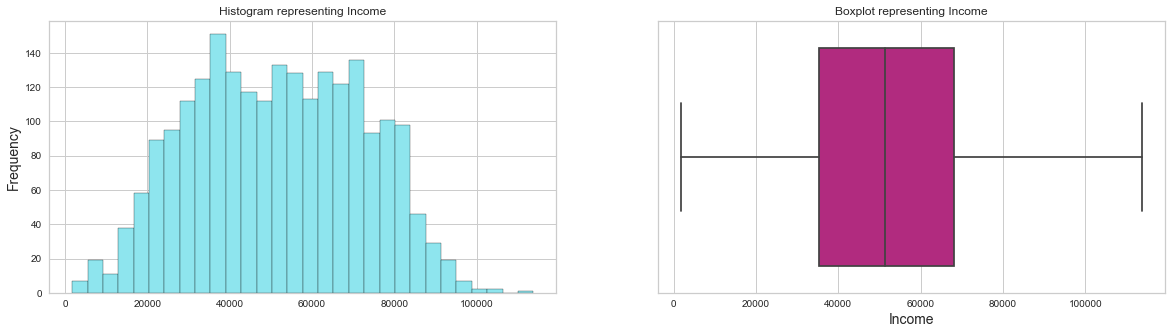

In [43]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["Income"], data=X, color = '#C71585',ax = ax[1])
X["Income"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'Income', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing Income')
ax[0].title.set_text('Histogram representing Income')

### MntMeatProducts

### Check the distribution of the variable MntMeatProducts for outliers

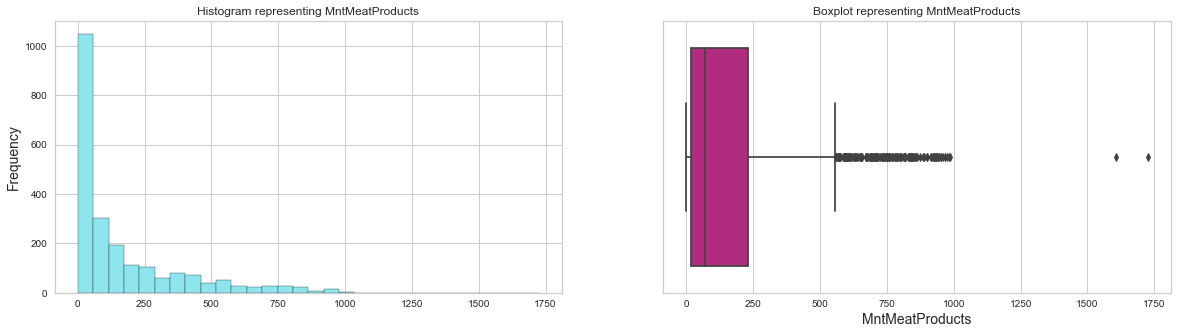

In [44]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["MntMeatProducts"], data=X, color = '#C71585',ax = ax[1])
X["MntMeatProducts"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'MntMeatProducts', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing MntMeatProducts')
ax[0].title.set_text('Histogram representing MntMeatProducts')

In [45]:
#Remove Outliers
outliers = X[(X.MntMeatProducts >1500)].copy()
X = X[(X.MntMeatProducts <1500 ) | (X.MntMeatProducts.isnull())]

In [46]:
#Check how much data was deleted
print("We deleted " + str(2240 - X.shape[0]) + " observations from the X dataset, that is " + str(((2240 - X.shape[0])/2240)*100) + "% of the observations.")

We deleted 20 observations from the X dataset, that is 0.8928571428571428% of the observations.


### Re-Check Distribution

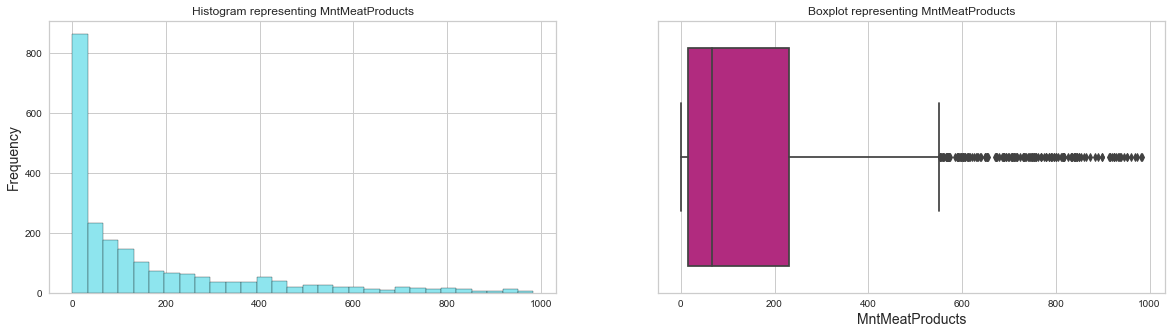

In [47]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["MntMeatProducts"], data=X, color = '#C71585',ax = ax[1])
X["MntMeatProducts"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'MntMeatProducts', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing MntMeatProducts')
ax[0].title.set_text('Histogram representing MntMeatProducts')

### MntGoldProds

### Check the distribution of the variable MntGoldProds for outliers


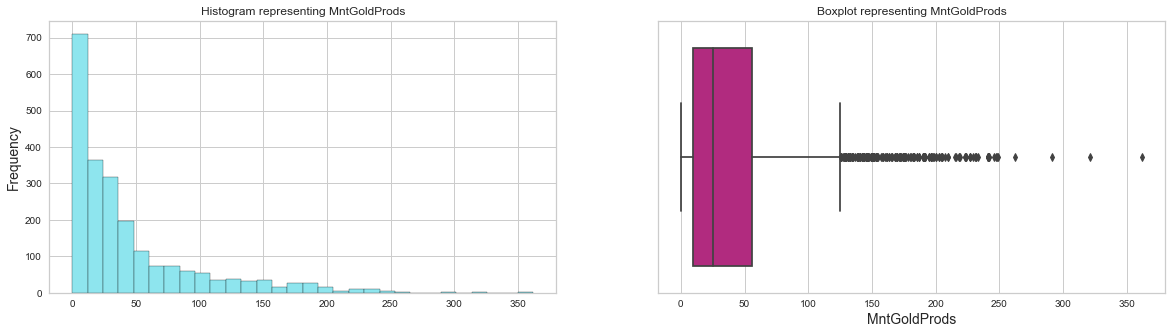

In [48]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["MntGoldProds"], data=X, color = '#C71585',ax = ax[1])
X["MntGoldProds"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'MntGoldProds', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing MntGoldProds')
ax[0].title.set_text('Histogram representing MntGoldProds')

In [49]:
#Remove Outliers
outliers = X[(X.MntGoldProds >241)].copy()
X = X[(X.MntGoldProds <241 ) | (X.MntGoldProds.isnull())]

In [50]:
#Check how much data was deleted
print("We deleted " + str(2240 - X.shape[0]) + " observations from the X dataset, that is " + str(((2240 - X.shape[0])/2240)*100) + "% of the observations.")

We deleted 36 observations from the X dataset, that is 1.607142857142857% of the observations.


### Re-Check Distribution

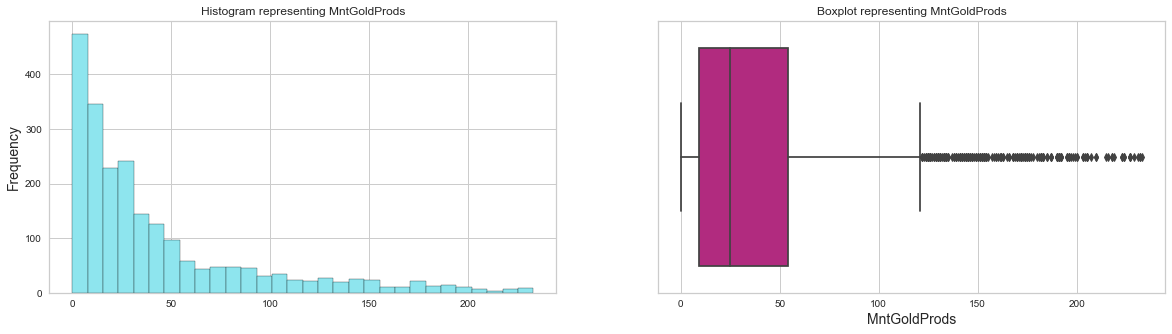

In [51]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["MntGoldProds"], data=X, color = '#C71585',ax = ax[1])
X["MntGoldProds"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'MntGoldProds', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing MntGoldProds')
ax[0].title.set_text('Histogram representing MntGoldProds')

### NumCatalogPurchases

### Check the distribution of the variable NumCatalogPurchases for outliers

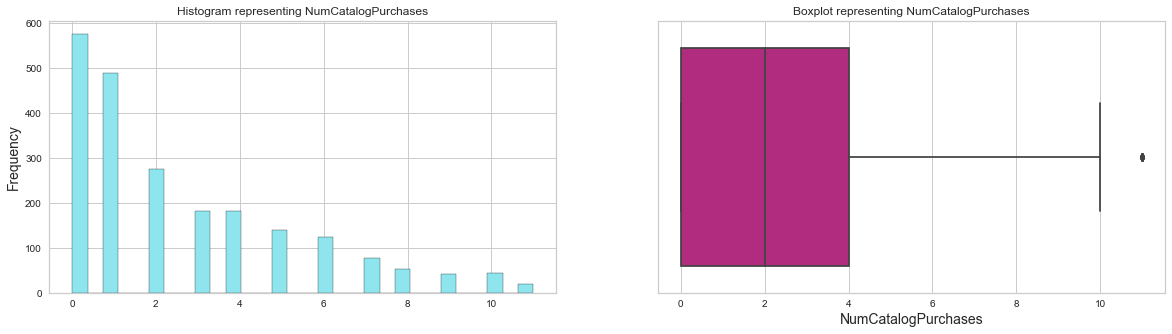

In [52]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["NumCatalogPurchases"], data=X, color = '#C71585',ax = ax[1])
X["NumCatalogPurchases"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'NumCatalogPurchases', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing NumCatalogPurchases')
ax[0].title.set_text('Histogram representing NumCatalogPurchases')

In [53]:
#Remove Outliers
outliers = X[(X.NumCatalogPurchases >11)].copy()
X = X[(X.NumCatalogPurchases <11 ) | (X.NumCatalogPurchases.isnull())]

In [54]:
#Check how much data was deleted
print("We deleted " + str(2240 - X.shape[0]) + " observations from the X dataset, that is " + str(((2240 - X.shape[0])/2240)*100) + "% of the observations.")

We deleted 55 observations from the X dataset, that is 2.455357142857143% of the observations.


### Re-Check Distribution

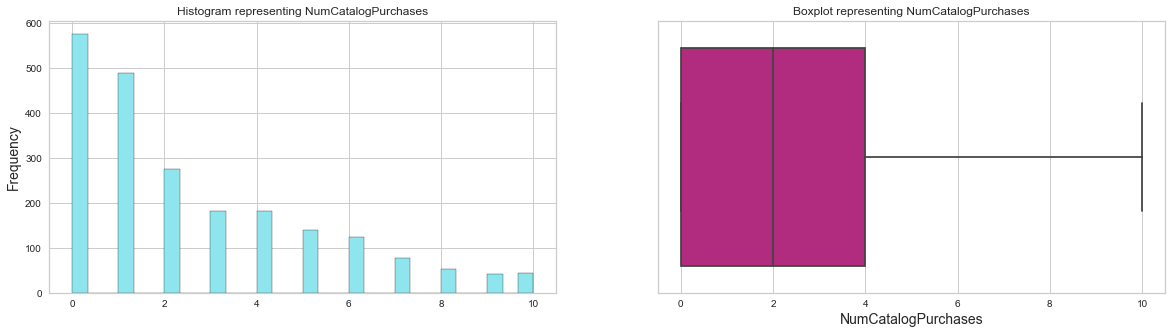

In [55]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["NumCatalogPurchases"], data=X, color = '#C71585',ax = ax[1])
X["NumCatalogPurchases"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'NumCatalogPurchases', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing NumCatalogPurchases')
ax[0].title.set_text('Histogram representing NumCatalogPurchases')

### NumWebPurchases

### Check the distribution of the variable NumWebPurchases for outliers

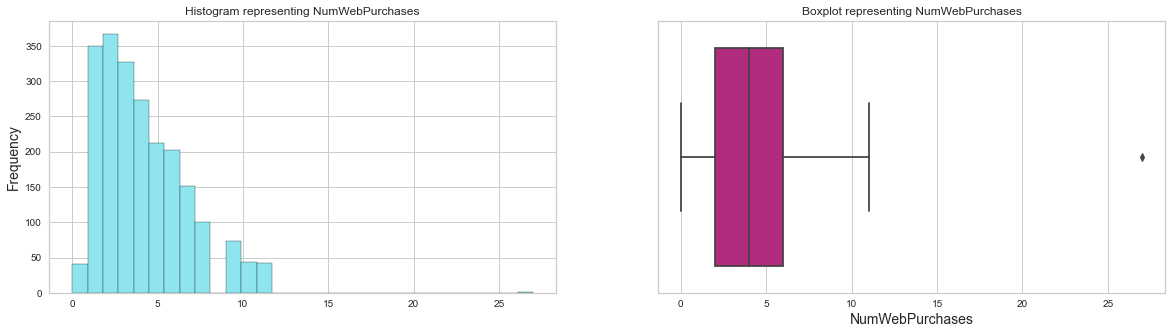

In [56]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["NumWebPurchases"], data=X, color = '#C71585',ax = ax[1])
X["NumWebPurchases"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'NumWebPurchases', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing NumWebPurchases')
ax[0].title.set_text('Histogram representing NumWebPurchases')

In [57]:
#Remove Outliers
outliers = X[(X.NumWebPurchases >24)].copy()
X = X[(X.NumWebPurchases <24 ) | (X.NumWebPurchases.isnull())]

In [58]:
#Check how much data was deleted
print("We deleted " + str(2240 - X.shape[0]) + " observations from the X dataset, that is " + str(((2240 - X.shape[0])/2240)*100) + "% of the observations.")

We deleted 56 observations from the X dataset, that is 2.5% of the observations.


### Re-Check Distribution 

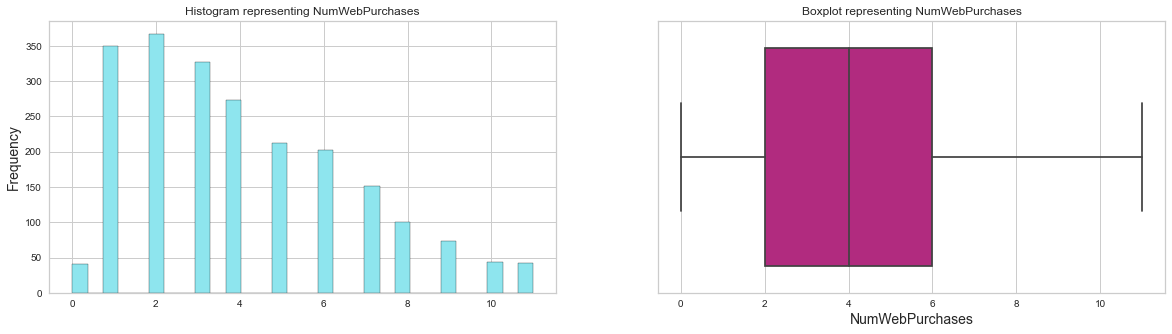

In [59]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["NumWebPurchases"], data=X, color = '#C71585',ax = ax[1])
X["NumWebPurchases"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'NumWebPurchases', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing NumWebPurchases')
ax[0].title.set_text('Histogram representing NumWebPurchases')

### NumDealsPurchases

### Check the distribution of the variable NumDealsPurchases for outliers

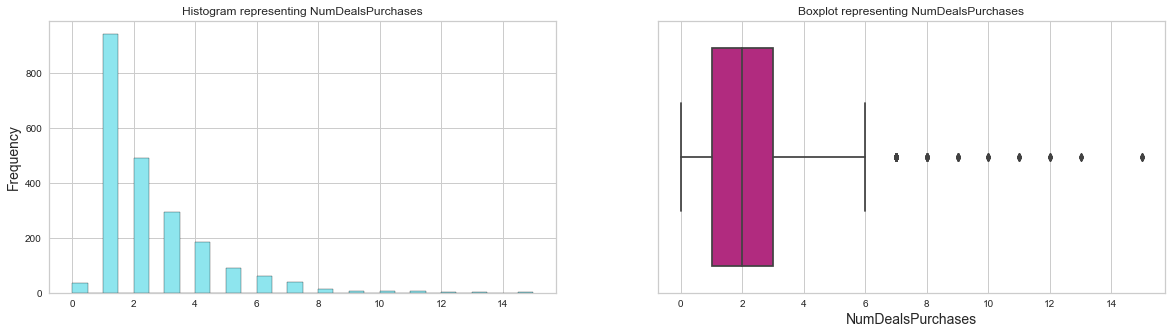

In [60]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["NumDealsPurchases"], data=X, color = '#C71585',ax = ax[1])
X["NumDealsPurchases"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'NumDealsPurchases', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing NumDealsPurchases')
ax[0].title.set_text('Histogram representing NumDealsPurchases')

In [61]:
#Remove Outliers
outliers = X[(X.NumDealsPurchases >14)].copy()
X = X[(X.NumDealsPurchases <14 ) | (X.NumDealsPurchases.isnull())]

In [62]:
#Check how much data was deleted
print("We deleted " + str(2240 - X.shape[0]) + " observations from the X dataset, that is " + str(((2240 - X.shape[0])/2240)*100) + "% of the observations.")

We deleted 60 observations from the X dataset, that is 2.6785714285714284% of the observations.


### Re-Check Distribution

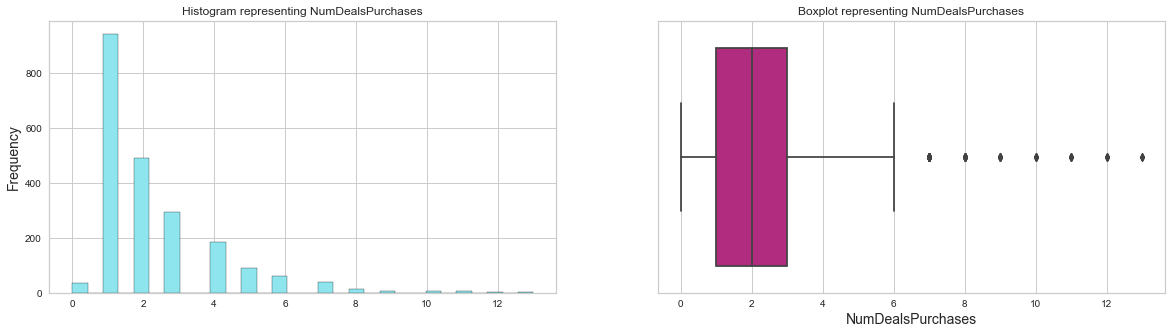

In [63]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["NumDealsPurchases"], data=X, color = '#C71585',ax = ax[1])
X["NumDealsPurchases"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'NumDealsPurchases', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing NumDealsPurchases')
ax[0].title.set_text('Histogram representing NumDealsPurchases')

### NumWebVisitsMonth

### Check the distribution of the variable NumWebVisitsMonth for outliers

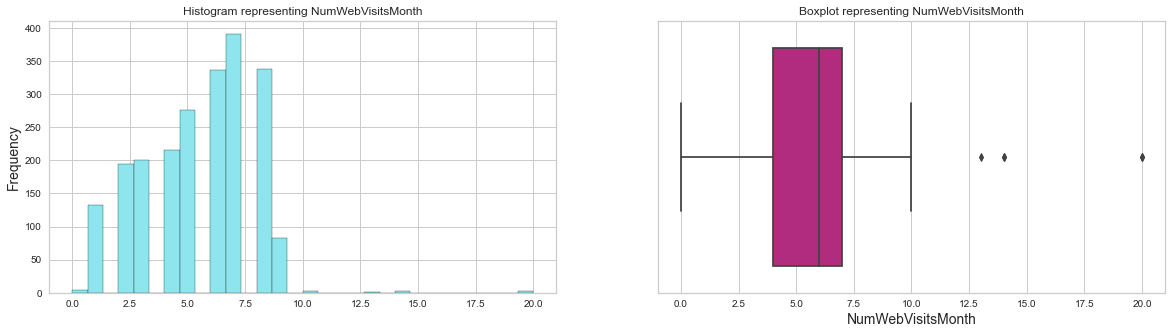

In [64]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["NumWebVisitsMonth"], data=X, color = '#C71585',ax = ax[1])
X["NumWebVisitsMonth"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'NumWebVisitsMonth', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing NumWebVisitsMonth')
ax[0].title.set_text('Histogram representing NumWebVisitsMonth')

In [65]:
#Remove Outliers
outliers = X[(X.NumWebVisitsMonth >12.5)].copy()
X = X[(X.NumWebVisitsMonth <12.5 ) | (X.NumWebVisitsMonth.isnull())]

In [66]:
#Check how much data was deleted
print("We deleted " + str(2240 - X.shape[0]) + " observations from the X dataset, that is " + str(((2240 - X.shape[0])/2240)*100) + "% of the observations.")

We deleted 65 observations from the X dataset, that is 2.9017857142857144% of the observations.


### Re-Check Distribution


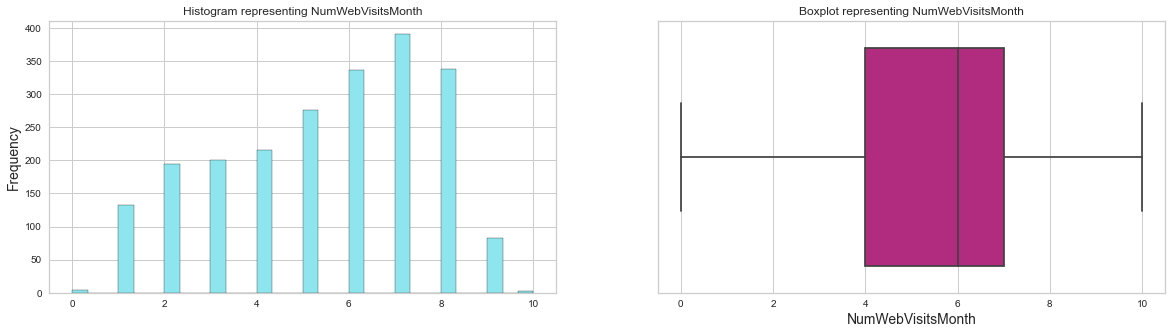

In [67]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["NumWebVisitsMonth"], data=X, color = '#C71585',ax = ax[1])
X["NumWebVisitsMonth"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'NumWebVisitsMonth', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing NumWebVisitsMonth')
ax[0].title.set_text('Histogram representing NumWebVisitsMonth')

### MntSweetProducts

### Check the distribution of the variable MntSweetProducts for outliers

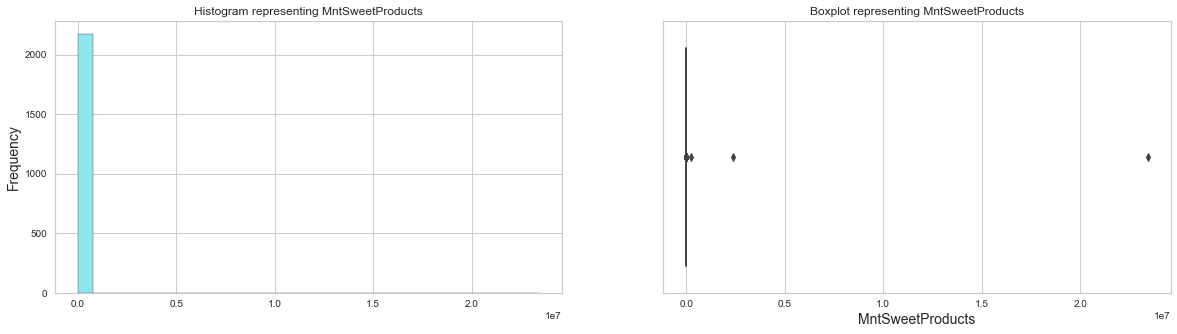

In [68]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["MntSweetProducts"], data=X, color = '#C71585',ax = ax[1])
X["MntSweetProducts"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'MntSweetProducts', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing MntSweetProducts')
ax[0].title.set_text('Histogram representing MntSweetProducts')

In [69]:
#Remove Outliers
outliers = X[(X.MntSweetProducts >263)].copy()
X = X[(X.MntSweetProducts <263 ) | (X.MntSweetProducts.isnull())]

In [70]:
#Check how much data was deleted
print("We deleted " + str(2240 - X.shape[0]) + " observations from the X dataset, that is " + str(((2240 - X.shape[0])/2240)*100) + "% of the observations.")

We deleted 68 observations from the X dataset, that is 3.0357142857142856% of the observations.


### Re-Check Distribution

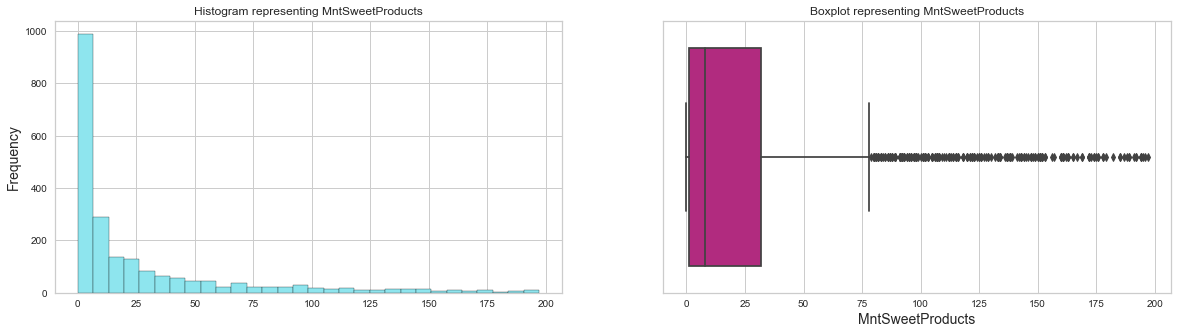

In [71]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["MntSweetProducts"], data=X, color = '#C71585',ax = ax[1])
X["MntSweetProducts"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'MntSweetProducts', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing MntSweetProducts')
ax[0].title.set_text('Histogram representing MntSweetProducts')

### MntWines

### Check the distribution of the variable MntWines for outliers

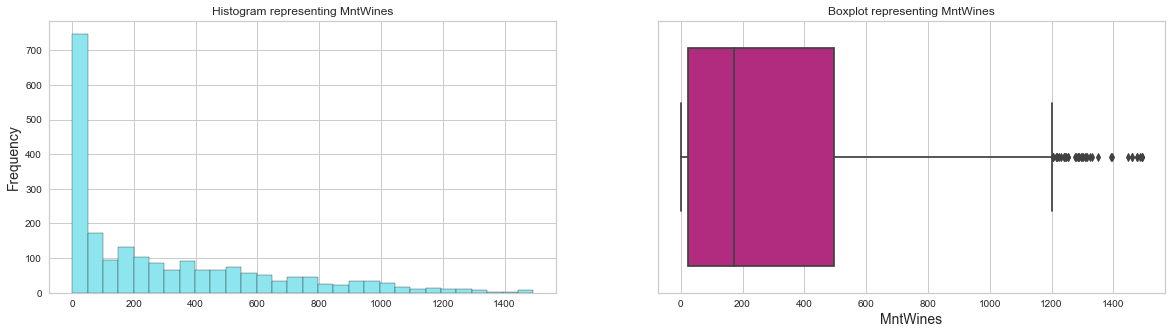

In [72]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["MntWines"], data=X, color = '#C71585',ax = ax[1])
X["MntWines"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'MntWines', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing MntWines')
ax[0].title.set_text('Histogram representing MntWines')

In [73]:
#Remove Outliers
outliers = X[(X.MntWines >1380)].copy()
X = X[(X.MntWines <1380 ) | (X.MntWines.isnull())]

In [74]:
#Check how much data was deleted
print("We deleted " + str(2240 - X.shape[0]) + " observations from the X dataset, that is " + str(((2240 - X.shape[0])/2240)*100) + "% of the observations.")

We deleted 79 observations from the X dataset, that is 3.5267857142857144% of the observations.


### Re-Check Distribution

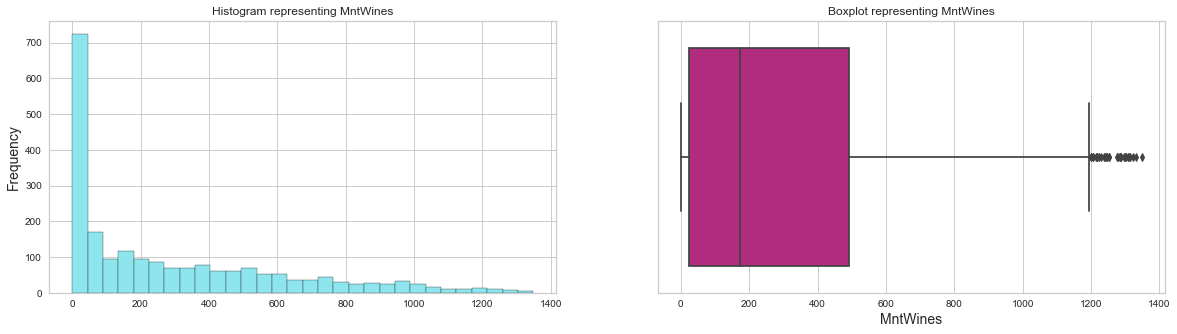

In [75]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=X["MntWines"], data=X, color = '#C71585',ax = ax[1])
X["MntWines"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'MntWines', 
                      color = '#8EE5EE',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing MntWines')
ax[0].title.set_text('Histogram representing MntWines')

### Boxplots to check outliers

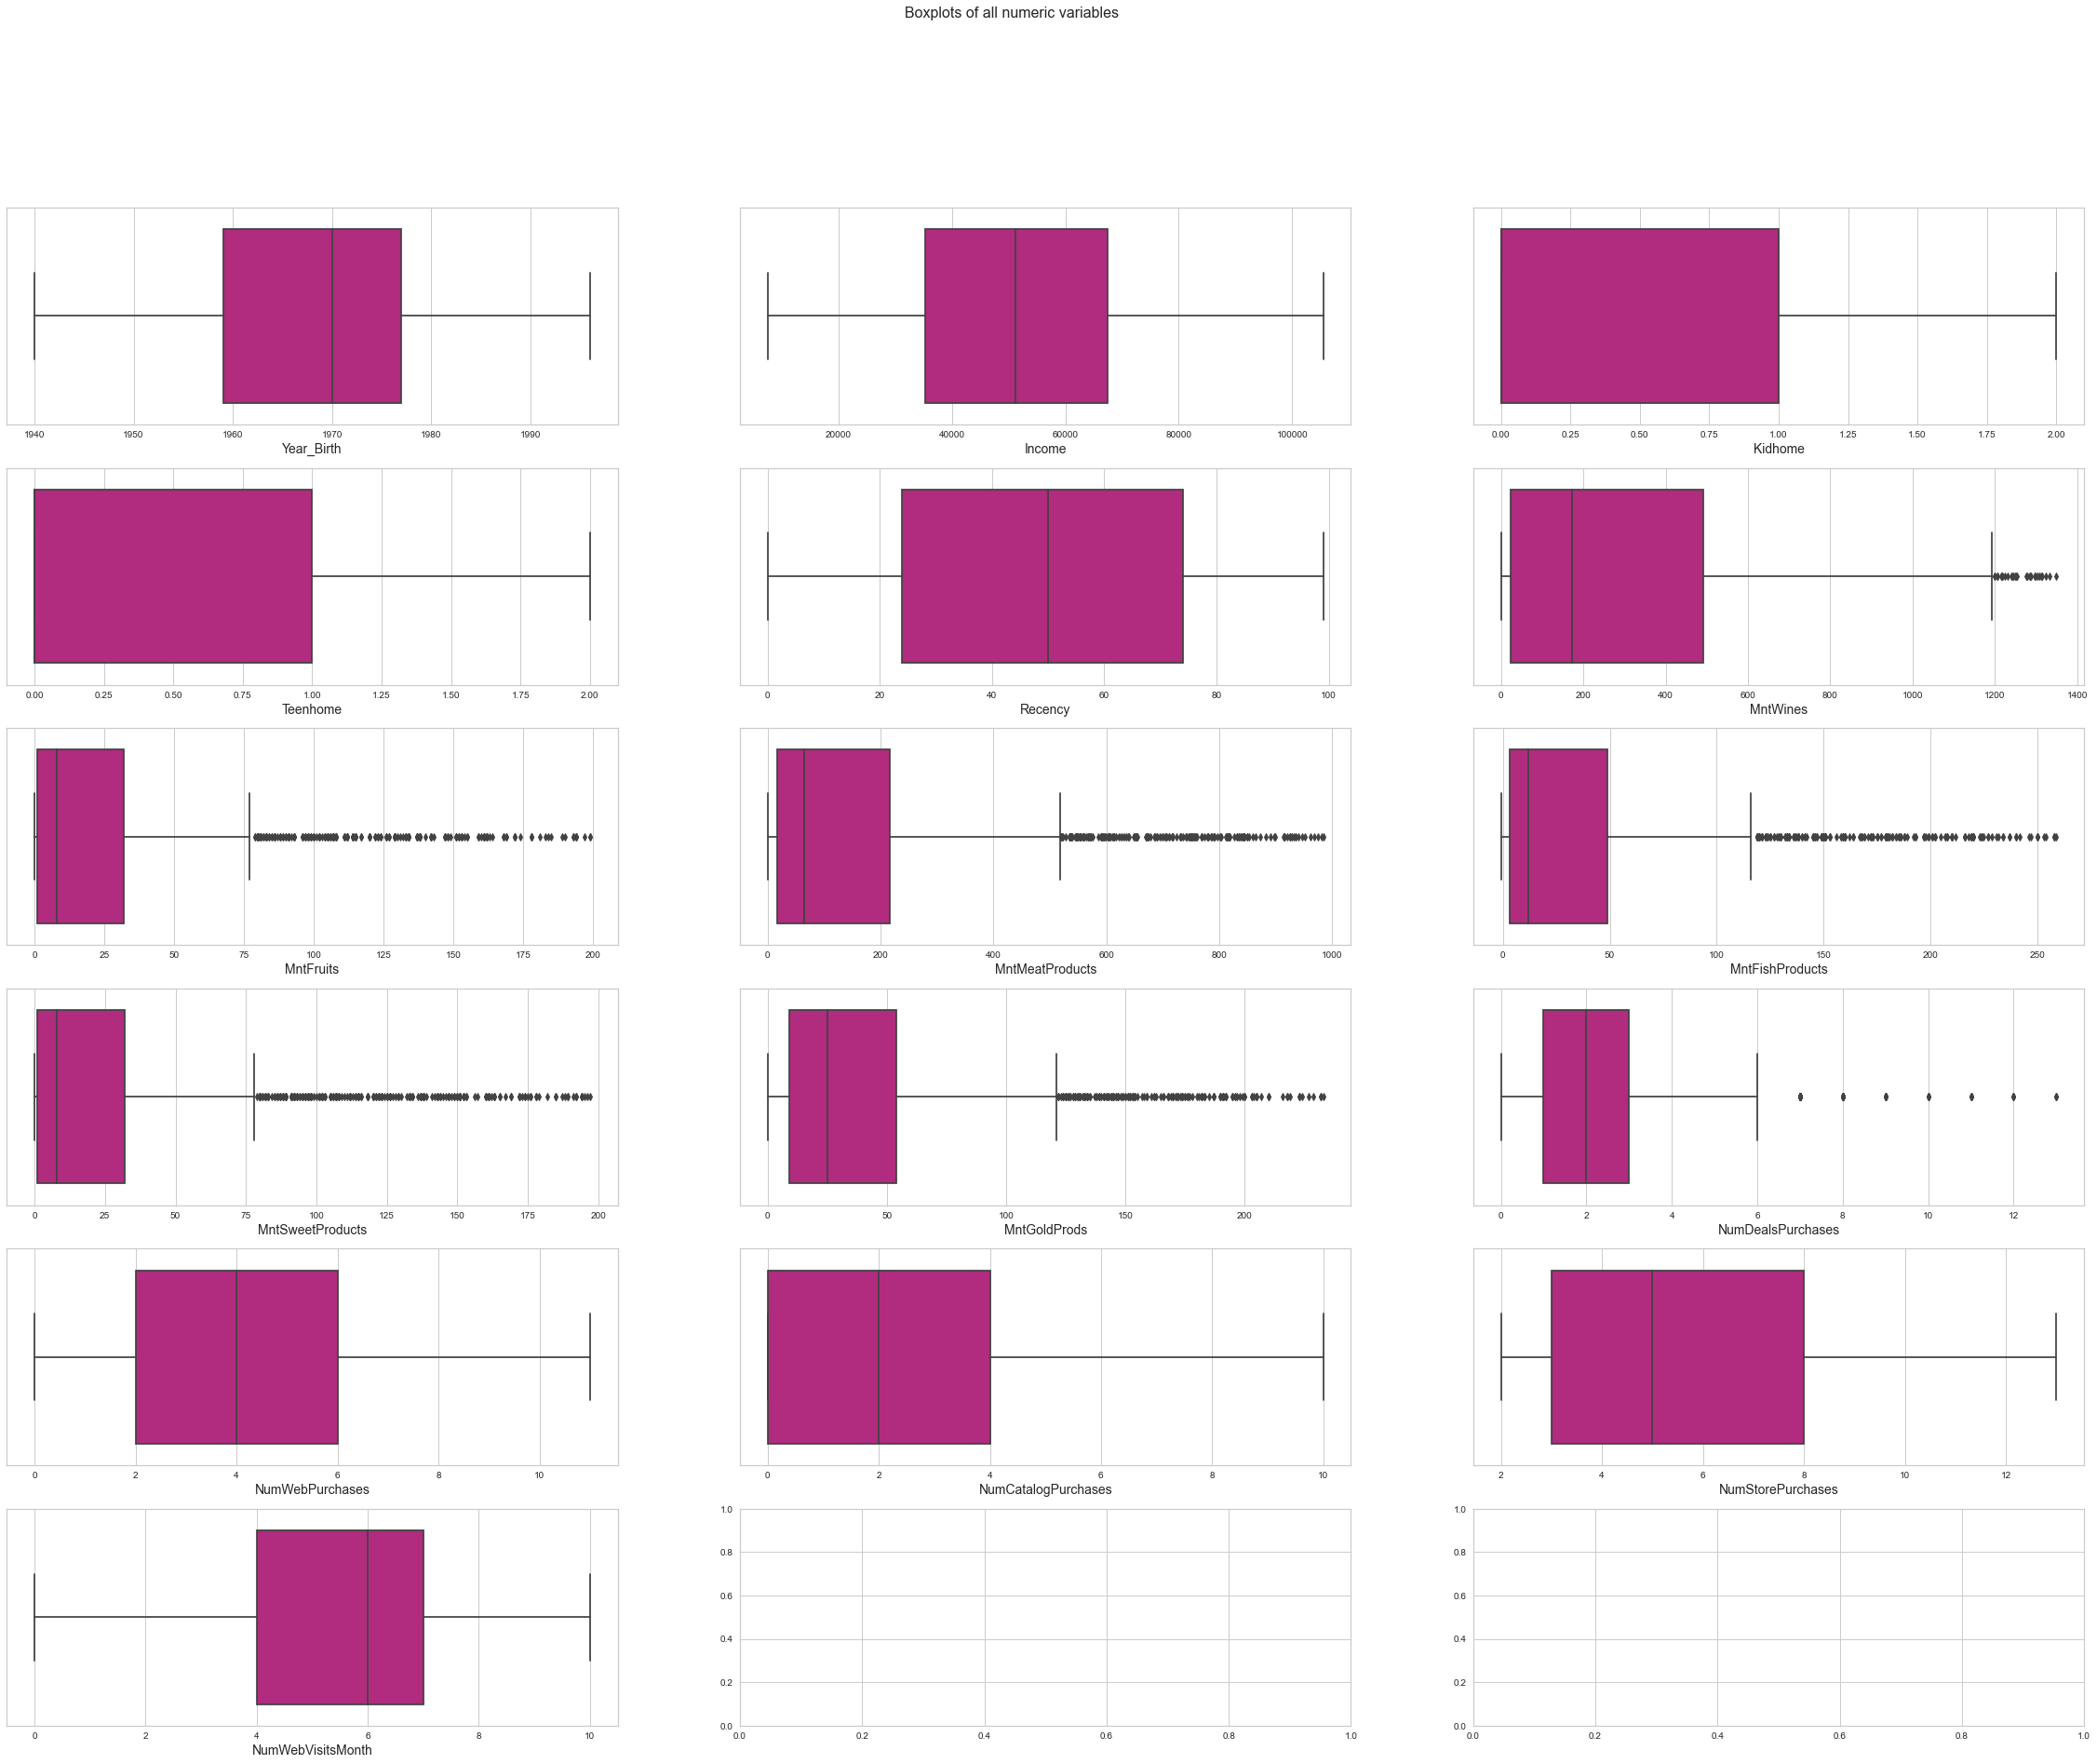

In [76]:
numerical=X.select_dtypes(include = [np.number]).columns.tolist()

fig, ax = plt.subplots(6, 3, figsize = (40,30))
for var, subplot in zip(X[numerical], ax.flatten()):
    g = sns.boxplot(data = X,
                 x = var,
                 color = '#C71585',
                 ax = subplot)

plt.rc('axes', labelsize = subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);

<a class="anchor" id="3.6">
    
## 3.6 Skewness

Skew = 0 - Normal Distribution; Skew < 0 - Negative/Left Skewness - if we have outliers they will most likely be on the left side and the right side will have more observations; Skew > 0 - Positive/Right Skewness - if we have outliers they will most likely be on the right side and the left side will have more observations.

In [77]:
#Checking skewness and kurtosis
X.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Year_Birth,-0.096651,-0.792797
Income,0.057407,-0.860615
Kidhome,0.605343,-0.805261
Teenhome,0.387861,-1.001338
Recency,-0.005873,-1.199146
MntWines,1.133150,0.373232
MntFruits,2.140301,4.299695
MntMeatProducts,1.779530,2.580654
MntFishProducts,1.949356,3.254698
MntSweetProducts,2.090716,3.945175


We'll be dealing twith the Numeric Variables first which have all positve skewness

### Histograms on all variables with skewness above moderate (> -0.5/< 0.5) to check distribution

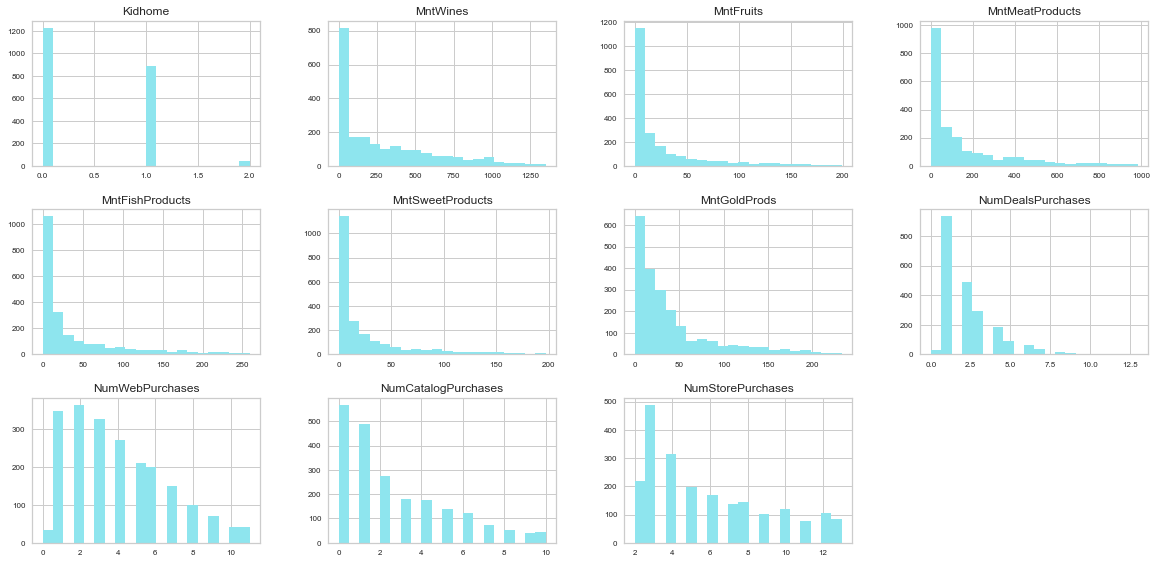

In [78]:
cols = ['Kidhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
X[cols].hist(bins=20, figsize=(20, 20), layout=(6, 4), xlabelsize=8, color ='#8EE5EE', ylabelsize=8);

### CubeBoot transformation for variable MntWines with a high positive skew

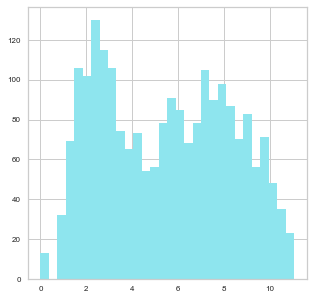

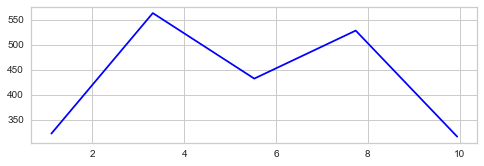

In [79]:
X['MntWines_tr'] = np.cbrt(X['MntWines'])

X['MntWines_tr'].hist(bins=30, figsize=(5, 5), xlabelsize=8,color ='#8EE5EE', ylabelsize=8)
plt.show()
plt.subplot(212)
y, binEdges = np.histogram(X['MntWines_tr'], bins=5)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='blue')
plt.show()

### CubeRoot transformation for variable MntFruits with a high positive skew

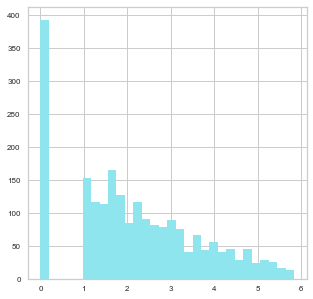

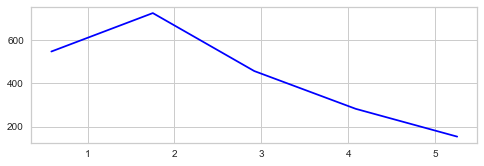

In [80]:
X['MntFruits_tr'] = np.cbrt(X['MntFruits'])

X['MntFruits_tr'].hist(bins=30, figsize=(5, 5), xlabelsize=8,color ='#8EE5EE', ylabelsize=8)
plt.show()
plt.subplot(212)
y, binEdges = np.histogram(X['MntFruits_tr'], bins=5)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='blue')
plt.show()

### CubeBoot transformation for variable MntMeatProducts with a high positive skew

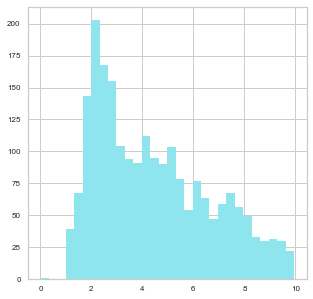

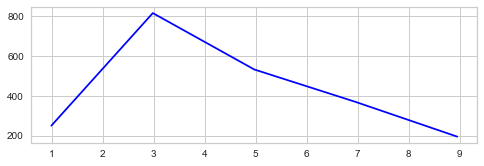

In [81]:
X['MntMeatProducts_tr'] = np.cbrt(X['MntMeatProducts'])

X['MntMeatProducts_tr'].hist(bins=30, figsize=(5, 5), xlabelsize=8,color ='#8EE5EE', ylabelsize=8)
plt.show()
plt.subplot(212)
y, binEdges = np.histogram(X['MntMeatProducts_tr'], bins=5)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='blue')
plt.show()

### CubeBoot transformation for variable MntFishProducts with a high positive skew

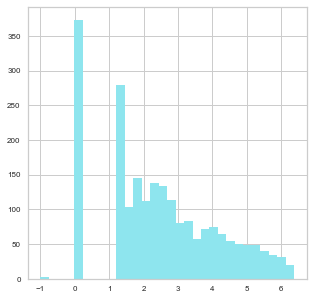

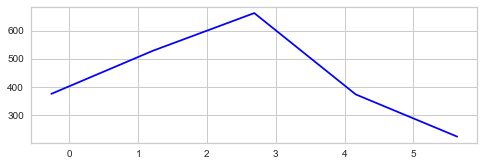

In [82]:
X['MntFishProducts_tr'] = np.cbrt(X['MntFishProducts'])

X['MntFishProducts_tr'].hist(bins=30, figsize=(5, 5), xlabelsize=8,color ='#8EE5EE', ylabelsize=8)
plt.show()
plt.subplot(212)
y, binEdges = np.histogram(X['MntFishProducts_tr'], bins=5)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='blue')
plt.show()

### CubeBoot transformation for variable MntSweetProducts with a high positive skew

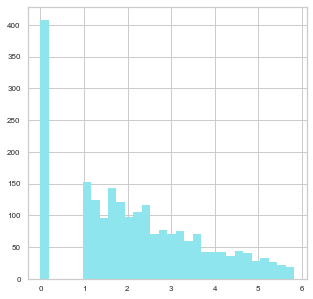

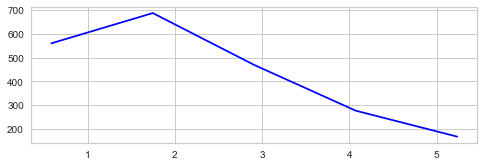

In [83]:
X['MntSweetProducts_tr'] = np.cbrt(X['MntSweetProducts'])

X['MntSweetProducts_tr'].hist(bins=30, figsize=(5, 5), xlabelsize=8,color ='#8EE5EE', ylabelsize=8)
plt.show()
plt.subplot(212)
y, binEdges = np.histogram(X['MntSweetProducts_tr'], bins=5)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='blue')
plt.show()

### CubeBoot transformation for variable MntGoldProds with a high positive skew

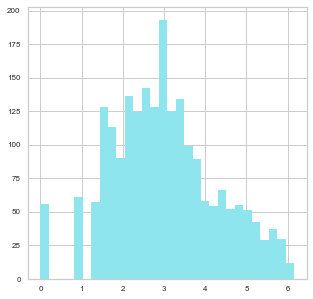

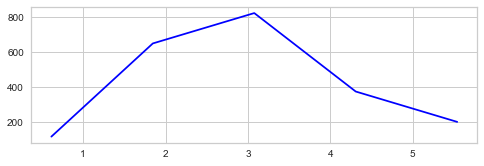

In [84]:
X['MntGoldProds_tr'] = np.cbrt(X['MntGoldProds'])

X['MntGoldProds_tr'].hist(bins=30, figsize=(5, 5), xlabelsize=8,color ='#8EE5EE', ylabelsize=8)
plt.show()
plt.subplot(212)
y, binEdges = np.histogram(X['MntGoldProds_tr'], bins=5)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='blue')
plt.show()

### CubeBoot transformation for variable NumDealsPurchases with a high positive skew

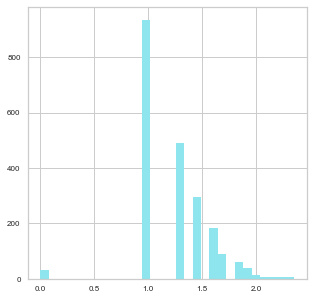

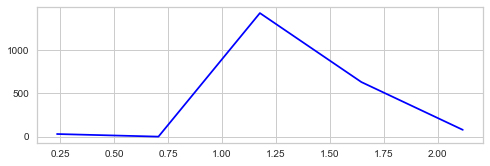

In [85]:
X['NumDealsPurchases_tr'] = np.cbrt(X['NumDealsPurchases'])

X['NumDealsPurchases_tr'].hist(bins=30, figsize=(5, 5), xlabelsize=8,color ='#8EE5EE', ylabelsize=8)
plt.show()
plt.subplot(212)
y, binEdges = np.histogram(X['NumDealsPurchases_tr'], bins=5)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='blue')
plt.show()

### SquareRoot transformation for variable NumWebPurchases with a moderate positive skew

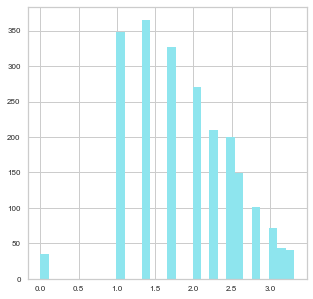

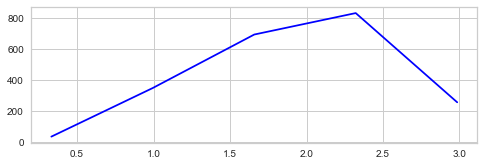

In [86]:
X['NumWebPurchases_tr'] = np.sqrt(X['NumWebPurchases'])

X['NumWebPurchases_tr'].hist(bins=30, figsize=(5, 5), xlabelsize=8,color ='#8EE5EE', ylabelsize=8)
plt.show()
plt.subplot(212)
y, binEdges = np.histogram(X['NumWebPurchases_tr'], bins=5)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='blue')
plt.show()

### SquareRoot transformation for variable NumCatalogPurchases with a high positive skew

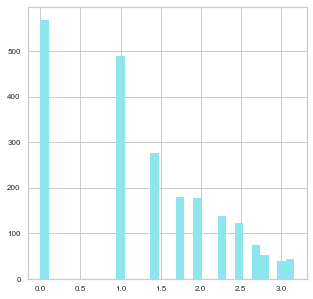

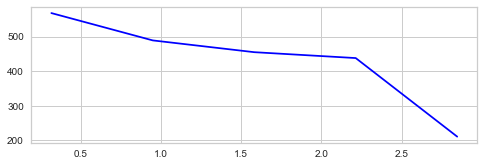

In [87]:
X['NumCatalogPurchases_tr'] = np.sqrt(X['NumCatalogPurchases'])

X['NumCatalogPurchases_tr'].hist(bins=30, figsize=(5, 5), xlabelsize=8,color ='#8EE5EE', ylabelsize=8)
plt.show()
plt.subplot(212)
y, binEdges = np.histogram(X['NumCatalogPurchases_tr'], bins=5)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='blue')
plt.show()

### SquareRoot transformation for variable NumStorePurchases with a moderate positive skew

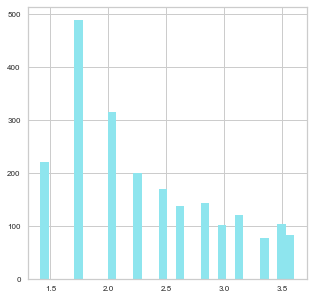

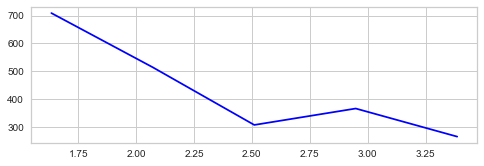

In [88]:
X['NumStorePurchases_tr'] = np.sqrt(X['NumStorePurchases'])

X['NumStorePurchases_tr'].hist(bins=30, figsize=(5, 5), xlabelsize=8,color ='#8EE5EE', ylabelsize=8)
plt.show()
plt.subplot(212)
y, binEdges = np.histogram(X['NumStorePurchases_tr'], bins=5)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='blue')
plt.show()

In [89]:
#Re-Checking skewness and kurtosis
cols = ['MntWines_tr', 'MntFruits_tr', 'MntMeatProducts_tr', 'MntFishProducts_tr', 'MntSweetProducts_tr', 'MntGoldProds_tr', 'NumDealsPurchases_tr', 'NumWebPurchases_tr', 'NumCatalogPurchases_tr', 'NumStorePurchases_tr']
X[cols].agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
MntWines_tr,0.086251,-1.218204
MntFruits_tr,0.317465,-0.626185
MntMeatProducts_tr,0.583722,-0.700737
MntFishProducts_tr,0.267807,-0.675550
MntSweetProducts_tr,0.318442,-0.662668
MntGoldProds_tr,0.195466,-0.232219
NumDealsPurchases_tr,-0.026328,2.338773
NumWebPurchases_tr,-0.063664,-0.335851
NumCatalogPurchases_tr,0.054142,-1.043938
NumStorePurchases_tr,0.418652,-1.010798


<a class="anchor" id="3.7.">
    
## 3.7 Encoding categorical variables

In [90]:
# Encode categorical variables to dummy variables
cols = ['Education', 'Marital_Status']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
X = ce_one_hot.fit_transform(X)

In [91]:
cols = ['MntWines_tr', 'MntFruits_tr', 'MntMeatProducts_tr', 'MntFishProducts_tr', 'MntSweetProducts_tr', 'MntGoldProds_tr', 'NumDealsPurchases_tr', 'NumWebPurchases_tr', 'NumCatalogPurchases_tr', 'NumStorePurchases_tr', 'Dt_Customer']
X = X.drop(columns=cols)

In [92]:
#convert Traget variable to integer
X['Response']=X[['Response']].apply(lambda x: pd.factorize(x)[0])

In [93]:
X[['Response']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 5524 to 9405
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Response  2161 non-null   int64
dtypes: int64(1)
memory usage: 33.8 KB


<a class="anchor" id="4.">
    
# 4.0 Modeling

Regarding the models and its evaluation, we will take more attention to the Recall , since recall as one of the most important metrics since we rather target more people with the campaign (False Positives) than an audience that is too little (False Negatives) for a potential campaign.

In [94]:
# Create the Target
y = X['Response']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

In [96]:
# Remove the Target from the training
X_train = X_train.drop(['Response'],1)
X_test = X_test.drop(['Response'],1)

/var/folders/3r/2t4mdrb11dg2j122_tljy3ph0000gn/T/ipykernel_4206/3793180125.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = X_train.drop(['Response'],1)
/var/folders/3r/2t4mdrb11dg2j122_tljy3ph0000gn/T/ipykernel_4206/3793180125.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_test = X_test.drop(['Response'],1)


Counter({1: 1387, 0: 233})
1    0.856173
0    0.143827
Name: Response, dtype: float64


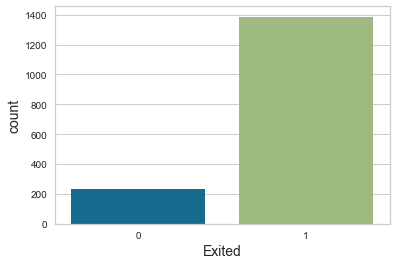

In [97]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Exited", data=pd.DataFrame(data={'Exited':y_train}), ax=ax)
print(y_train.value_counts(normalize=True))

In [98]:
!pip install imblearn

Counter({1: 1387, 0: 1387})


<AxesSubplot:xlabel='Exited', ylabel='count'>

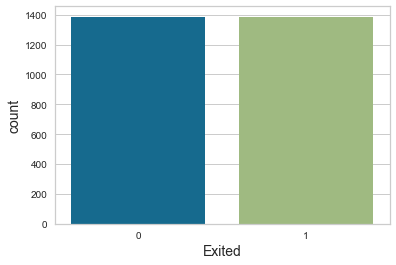

In [99]:
# Import package
from imblearn.over_sampling import SMOTE

# Applyting SMOTE to generare new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train2, y_train2 = sm.fit_resample(X_train, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Exited", data=pd.DataFrame(data={'Exited':y_train2}), ax=ax)

<a class="anchor" id="4.1.">
    
## 4.1 Decision Tree

In [100]:
# Create object and train the model
Model_DT = tree.DecisionTreeClassifier(max_depth=4, random_state=123)
Model_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=123)

<a class="anchor" id="4.1.1.">
    
### 4.1.1 Decision Tree Evaluation

In [101]:
# predict y for X_train and X_test
y_pred_train = Model_DT.predict(X_train) 
y_pred_test = Model_DT.predict(X_test) 

In [102]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [103]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

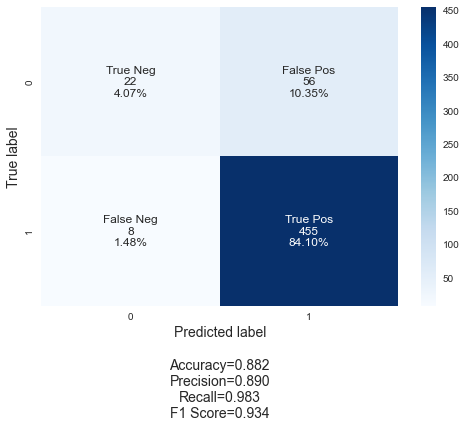

In [104]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [105]:
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.900617,0.881701
1,PRECISION,0.899609,0.890411
2,RECALL,0.994953,0.982721
3,F1 SCORE,0.944882,0.934292
4,AUC,0.667004,0.632386


/Users/marco/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


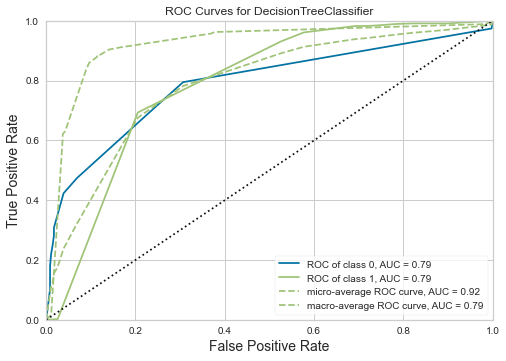

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [106]:
# ROC curve

visualizer = ROCAUC(Model_DT, classes=['0','1'])
visualizer.fit(X_train2, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

<a class="anchor" id="4.2.">
    
## 4.2 Support Vector Machines

In [107]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

In [108]:
# Remove the Target from the training
X_train = X_train.drop(['Response'],1)
X_test = X_test.drop(['Response'],1)

/var/folders/3r/2t4mdrb11dg2j122_tljy3ph0000gn/T/ipykernel_4206/3793180125.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = X_train.drop(['Response'],1)
/var/folders/3r/2t4mdrb11dg2j122_tljy3ph0000gn/T/ipykernel_4206/3793180125.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_test = X_test.drop(['Response'],1)


In [109]:
# Dataframe for scaling
tempDF = X.copy(deep=True)
tempDF.drop(columns='Response', inplace=True)

# Normalize training/test data
scaler = MinMaxScaler(feature_range=(0, 1))
tempDF_scaled = scaler.fit_transform(tempDF)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Counter({1: 1387, 0: 233})


<AxesSubplot:xlabel='Response', ylabel='count'>

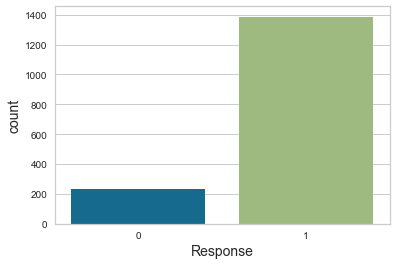

In [110]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train}), ax=ax)

Counter({1: 1387, 0: 1387})


<AxesSubplot:xlabel='Response', ylabel='count'>

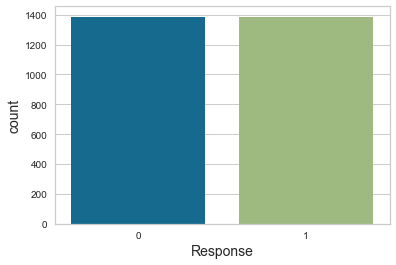

In [111]:
# Import package
from imblearn.over_sampling import SMOTE

# Applyting SMOTE to generare new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train_scaled2, y_train2 = sm.fit_resample(X_train_scaled, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train2}), ax=ax)

In [112]:
# Create object and train the model
Model_SVM = svm.SVC(gamma='scale', random_state=123, probability=True)
Model_SVM.fit(X_train_scaled2, y_train2)

SVC(probability=True, random_state=123)

<a class="anchor" id="4.2.1.">
    
### 4.2.1 Support Vector Machines Evaluation

In [113]:
# predict y for X_train and X_test
y_pred_train = Model_SVM.predict(X_train_scaled2) 
y_pred_test = Model_SVM.predict(X_test_scaled) 

In [114]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [115]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

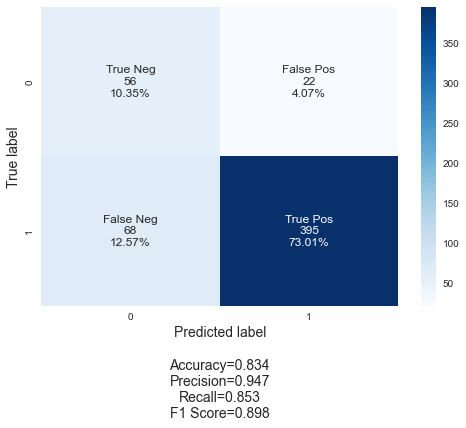

In [116]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [117]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.921774,0.833641
1,PRECISION,0.939189,0.947242
2,RECALL,0.901947,0.853132
3,F1 SCORE,0.920191,0.897727
4,AUC,0.921774,0.785540


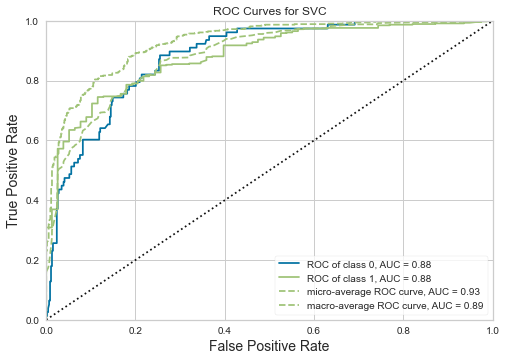

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [118]:
# ROC curve
visualizer = ROCAUC(Model_SVM, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

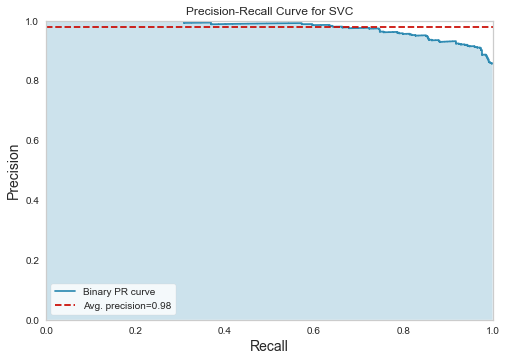

<AxesSubplot:title={'center':'Precision-Recall Curve for SVC'}, xlabel='Recall', ylabel='Precision'>

In [119]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(Model_SVM, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

<a class="anchor" id="4.3.">
    
## 4.3 K Neighbors

In [120]:
# Create object and train the model
Model_KN = KNeighborsClassifier(n_neighbors=5)
Model_KN.fit(X_train_scaled2, y_train2) # train the model (not training in reality)

KNeighborsClassifier()

<a class="anchor" id="4.3.1.">
    
### 4.3.1 K Neighbors Evaluation

In [121]:
# predict y for X_train and X_test
y_pred_train = Model_KN.predict(X_train_scaled2) 
y_pred_test = Model_KN.predict(X_test_scaled) 

In [122]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [123]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

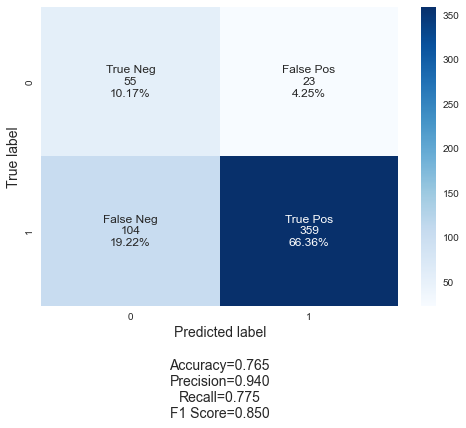

In [124]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [125]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.923216,0.765250
1,PRECISION,0.989983,0.939791
2,RECALL,0.855083,0.775378
3,F1 SCORE,0.917602,0.849704
4,AUC,0.923216,0.740253


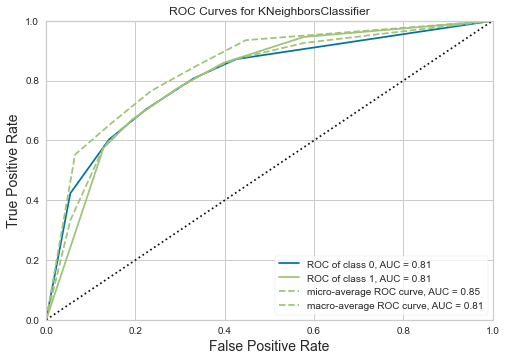

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [126]:
# ROC curve
visualizer = ROCAUC(Model_KN, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

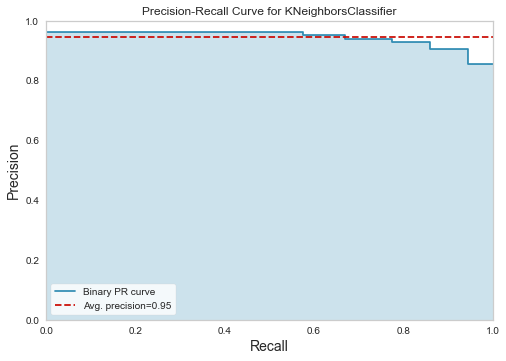

<AxesSubplot:title={'center':'Precision-Recall Curve for KNeighborsClassifier'}, xlabel='Recall', ylabel='Precision'>

In [127]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(Model_KN, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

<a class="anchor" id="4.4.">
    
## 4.4 Neural Networks

In [128]:
# Create object and train the model
Model_NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=123, max_iter=500)
Model_NN.fit(X_train_scaled2, y_train2)

/Users/marco/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=500,
              random_state=123, solver='lbfgs')

<a class="anchor" id="4.4.1.">
    
### 4.4.1 Neural Networks Evaluation

In [129]:
# predict y for X_train and X_test
y_pred_train = Model_NN.predict(X_train_scaled2) 
y_pred_test = Model_NN.predict(X_test_scaled) 

In [130]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [131]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

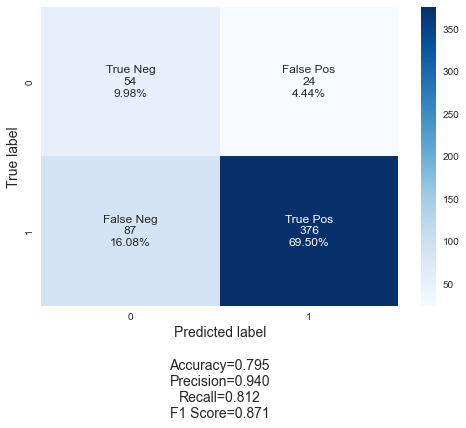

In [132]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [133]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.902307,0.794824
1,PRECISION,0.925305,0.940000
2,RECALL,0.875270,0.812095
3,F1 SCORE,0.899592,0.871379
4,AUC,0.902307,0.752201


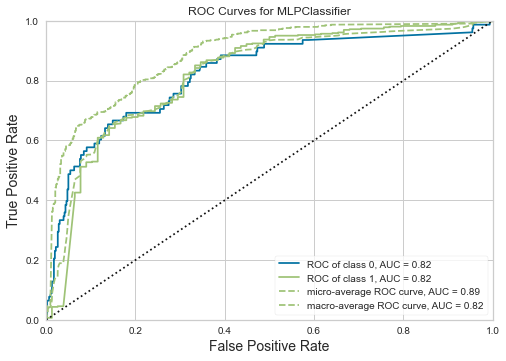

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [134]:
### ROC curve
visualizer = ROCAUC(Model_NN, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

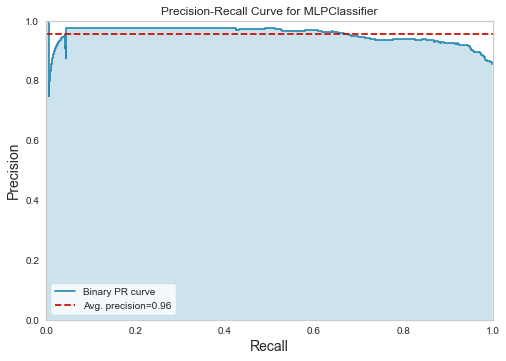

<AxesSubplot:title={'center':'Precision-Recall Curve for MLPClassifier'}, xlabel='Recall', ylabel='Precision'>

In [135]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(Model_NN, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

<a class="anchor" id="4.5.">
    
## 4.5 Naive Bayes

In [136]:
# Create object and train the model
Model_NB = GaussianNB()
Model_NB.fit(X_train_scaled2, y_train2)

GaussianNB()

<a class="anchor" id="4.5.1.">
    
## 4.5.1 Naive Bayes Evaluation

In [137]:
# predict y for X_train and X_test
y_pred_train = Model_NB.predict(X_train_scaled2) 
y_pred_test = Model_NB.predict(X_test_scaled) 

In [138]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [139]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

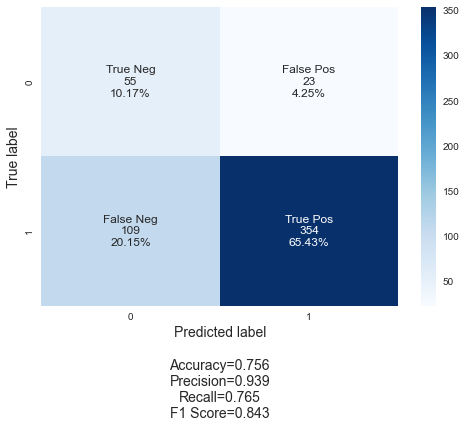

In [140]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [141]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.710166,0.756007
1,PRECISION,0.691650,0.938992
2,RECALL,0.758472,0.764579
3,F1 SCORE,0.723521,0.842857
4,AUC,0.710166,0.734854


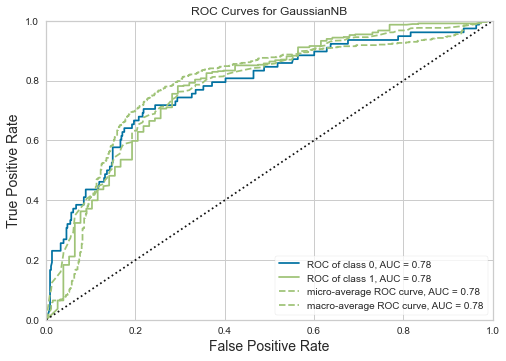

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [142]:
### ROC curve
visualizer = ROCAUC(Model_NB, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

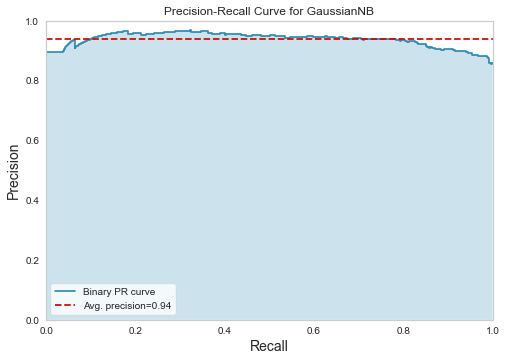

<AxesSubplot:title={'center':'Precision-Recall Curve for GaussianNB'}, xlabel='Recall', ylabel='Precision'>

In [143]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(Model_NB, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

<a class="anchor" id="4.6.">
    
## 4.6 Logistic Regression

In [144]:
# Dataframe for scaling
tempDF = X.copy(deep=True)
tempDF.drop(columns='Response', inplace=True)

# Normalize training/test data
scaler = MinMaxScaler(feature_range=(0, 1))
tempDF_scaled = scaler.fit_transform(tempDF)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [145]:
# Create object and train the model
Model_LR = LogisticRegression(random_state=123, max_iter=200)
Model_LR.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=123)

<a class="anchor" id="4.6.1.">
    
### 4.6.1 Logistic Regression Evaluation

In [146]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [147]:
# predict y for X_train and X_test
y_pred_train = Model_LR.predict(X_train_scaled) 
y_pred_test = Model_LR.predict(X_test_scaled) 

In [148]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

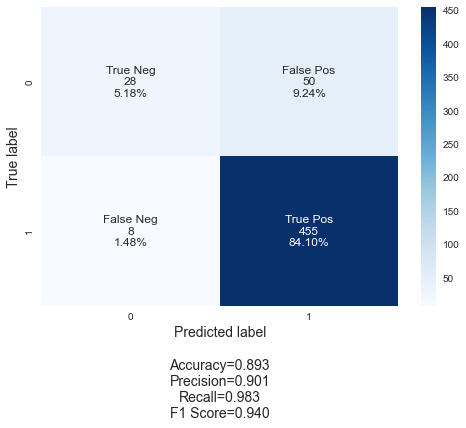

In [149]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [150]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.898765,0.892791
1,PRECISION,0.910678,0.900990
2,RECALL,0.977650,0.982721
3,F1 SCORE,0.942976,0.940083
4,AUC,0.703417,0.670848


Counter({1: 1387, 0: 233})


<AxesSubplot:xlabel='Response', ylabel='count'>

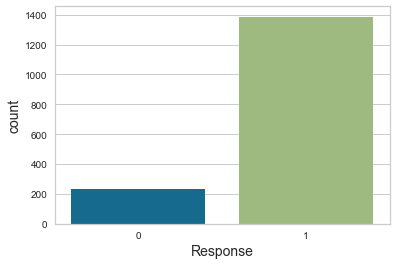

In [151]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train}), ax=ax)

<a class="anchor" id="4.6.2.">
    
### 4.6.2 Regression with oversampling

Counter({1: 1387, 0: 1387})


<AxesSubplot:xlabel='Exited', ylabel='count'>

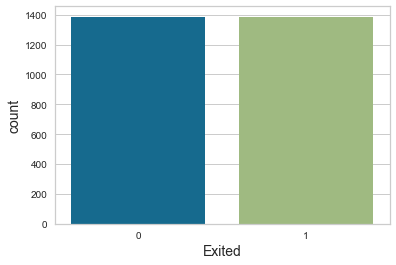

In [152]:
# Applyting SMOTE to generare new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train_scaled2, y_train2 = sm.fit_resample(X_train_scaled, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Exited", data=pd.DataFrame(data={'Exited':y_train2}), ax=ax)

In [153]:
# Train the model
Model_LR.fit(X_train_scaled2, y_train2)

# Predict values
# predict y for X_train and X_test
y_pred_train = Model_LR.predict(X_train_scaled2) 
y_pred_test = Model_LR.predict(X_test_scaled) 

# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.825162,0.811460
1,PRECISION,0.824928,0.961637
2,RECALL,0.825523,0.812095
3,F1 SCORE,0.825225,0.880562
4,AUC,0.825162,0.809894


<a class="anchor" id="4.6.3.">
    
### 4.6.3 Regression with undersampling

Counter({1: 1387, 0: 233})


<AxesSubplot:xlabel='Response', ylabel='count'>

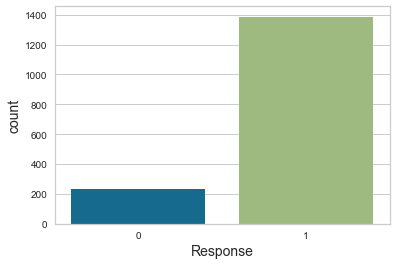

In [154]:
# Subset by class
ss_class_0 = pd.DataFrame(data=X_train_scaled[y_train == 0], index=X_train[y_train == 0].index)
ss_class_1 = pd.DataFrame(data=X_train_scaled[y_train == 1], index=X_train[y_train == 1].index)

# Do random under-sampling (the same 0's as the existing 1's)
count_class_0, count_class_1 = y_train.value_counts()
ss_class_0_under = ss_class_0.sample(count_class_1, replace=False)
X_train_scaled3 = pd.concat([ss_class_0_under, ss_class_1], axis=0)
y_train3 = y_train[X_train_scaled3.index]

# Present results
print(collections.Counter(y_train3))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train3}), ax=ax)


In [155]:
# Train the model
Model_LR.fit(X_train_scaled3, y_train3)

# Predict values
# predict y for X_train and X_test
y_pred_train = Model_LR.predict(X_train_scaled3) 
y_pred_test = Model_LR.predict(X_test_scaled) 

# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train3, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.898765,0.892791
1,PRECISION,0.910678,0.900990
2,RECALL,0.977650,0.982721
3,F1 SCORE,0.942976,0.940083
4,AUC,0.703417,0.670848


In [156]:
# Check AUC
FP,TP,thresholds = metrics.roc_curve(y_test,Model_LR.decision_function(X_test_scaled))
print("AUC:{}".format(metrics.auc(FP, TP))) # AUC of ROC

AUC:0.889073489505455


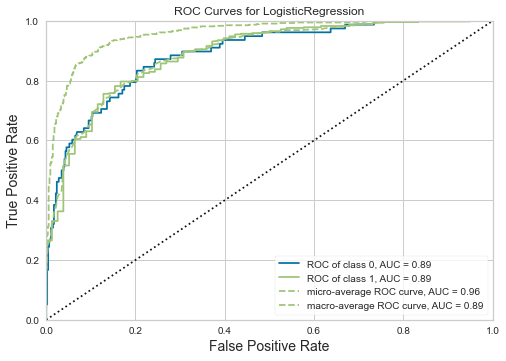

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [157]:
# ROC curve
visualizer = ROCAUC(Model_LR, classes=['0','1'])
visualizer.fit(X_train_scaled3, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

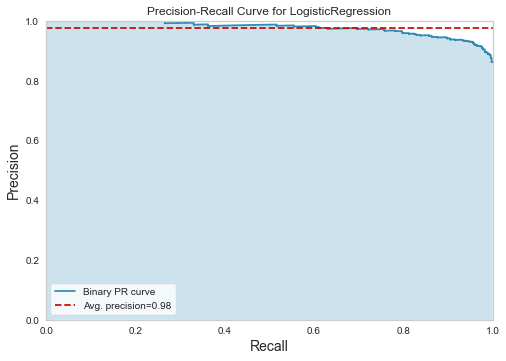

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [158]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(Model_LR, classes=['0','1'])
visualizer.fit(X_train_scaled3, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

In [159]:
# Show 10 top features coefficients
abs_coef = np.concatenate(np.abs(Model_LR.coef_))
sorted_index = np.argsort(abs_coef)[::-1] # sort indices
top_10 = sorted_index[:10]
top_10DF = pd.DataFrame(data={'feature': list(X_train.columns[top_10]), 'coef': abs_coef[top_10]})
top_10DF

,feature,coef
0,NumWebVisitsMonth,2.563286
1,Recency,2.417841
2,MntMeatProducts,2.229703
3,NumDealsPurchases,1.996605
4,Teenhome,1.876728
5,NumStorePurchases,1.873609
6,AcceptedCmp5,1.529123
7,AcceptedCmp2,1.351209
8,AcceptedCmp3,1.316959
9,NumCatalogPurchases,1.164136


<a class="anchor" id="4.7.">
    
## 4.7 Random Forest

In [160]:
#Create instance
modelRF = RandomForestClassifier()

In [161]:
#Fit model
modelRF.fit(X_train, y_train)

RandomForestClassifier()

In [162]:
#Get mean accuracy of the given test data
modelRF.score(X_test, y_test)

0.8817005545286506

In [163]:
#Get a list of the fitted base estimators and the number of Decision Trees included in the Random Forest.
len(modelRF.estimators_)

100

In [164]:
#Change the number of trees in the forest to 6
modelRF_6trees = RandomForestClassifier(n_estimators=6)

In [165]:
#Fit the model
modelRF_6trees.fit(X_train, y_train)

RandomForestClassifier(n_estimators=6)

In [166]:
# Define maximum depth of the trees-10
modelRF_maxdepth10 = RandomForestClassifier(max_depth=10)

In [167]:
#Fit the model
modelRF_maxdepth10.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [168]:
# Tune the maximum number of leaf nodes on the trees to 4
modelRF_leafs4 = RandomForestClassifier(max_leaf_nodes=4)

In [169]:
#Fit the model
modelRF_leafs4.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=4)

In [170]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [171]:
# predict y for X_train and X_test
y_pred_train = modelRF.predict(X_train_scaled) 
y_pred_test = modelRF.predict(X_test_scaled) 

/Users/marco/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/marco/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [172]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

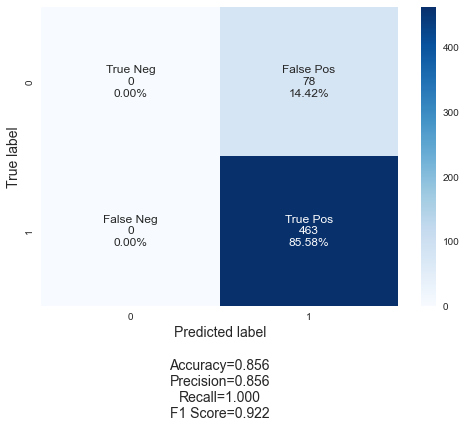

In [173]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [174]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.856173,0.855823
1,PRECISION,0.856173,0.855823
2,RECALL,1.000000,1.000000
3,F1 SCORE,0.922514,0.922311
4,AUC,0.500000,0.500000


/Users/marco/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/marco/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/marco/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


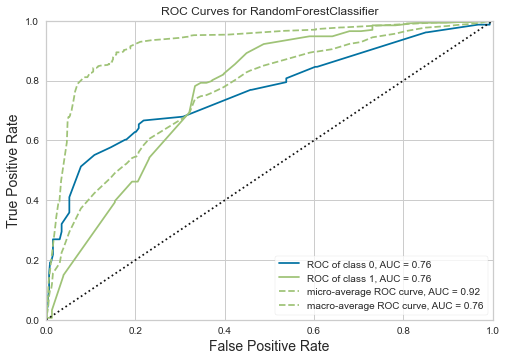

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [175]:
### ROC curve
visualizer = ROCAUC(modelRF, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

/Users/marco/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/marco/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/marco/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


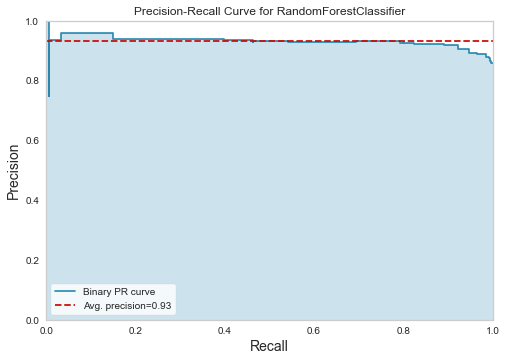

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [176]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(modelRF, classes=['0','1'])
visualizer.fit(X_train_scaled3, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

<a class="anchor" id="5.">
    
## 5. Extras

<a class="anchor" id="5.1.">
    
## 5.1. Bagging

In [177]:
#Get mean accuracy
Model_DT.score(X_train, y_train)

0.9006172839506172

In [178]:
#Get mean accuracy
Model_DT.score(X_test, y_test)

0.8817005545286506

In [179]:
#Perform classification for X_test and assign the predictions to the object pred_dt.
pred_dt = Model_DT.predict(X_test)

In [180]:
#Create instance using the previous model as base_estimator
bagging_dt = BaggingClassifier(base_estimator = Model_DT)

In [181]:
#Fit the model
bagging_dt.fit(X = X_train, y = y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        random_state=123))

In [182]:
#Get the mean accuracy of the given test data
bagging_dt.score(X_test, y_test)

0.8798521256931608

In [183]:
#Classification for X_test and assign the predictions to the object y_pred_bagging
y_pred_bagging = bagging_dt.predict(X_test)

In [184]:
#Import classification report to get the main classification metrics
from sklearn.metrics import classification_report

In [185]:
def metrics(y_model1, pred_model1, y_model2, pred_model2):
    print('___________________________________________________________________________________________________________')
    print('                                          Simple Model                                                     ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_model1, pred_model1))


    print('___________________________________________________________________________________________________________')
    print('                                              Bagging                                                      ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_model2, pred_model2))

In [186]:
metrics(y_test, pred_dt, y_test, y_pred_bagging)

___________________________________________________________________________________________________________
                                          Simple Model                                                     
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.28      0.41        78
           1       0.89      0.98      0.93       463

    accuracy                           0.88       541
   macro avg       0.81      0.63      0.67       541
weighted avg       0.87      0.88      0.86       541

___________________________________________________________________________________________________________
                                              Bagging                                                      
-----------------------------------------------------------------------------------------------------------
              precision  

In [187]:
#List of fitted base estimators
bagging_dt.estimators_

[DecisionTreeClassifier(max_depth=4, random_state=2082214989),
 DecisionTreeClassifier(max_depth=4, random_state=603213508),
 DecisionTreeClassifier(max_depth=4, random_state=347442741),
 DecisionTreeClassifier(max_depth=4, random_state=127111354),
 DecisionTreeClassifier(max_depth=4, random_state=615784172),
 DecisionTreeClassifier(max_depth=4, random_state=1388481099),
 DecisionTreeClassifier(max_depth=4, random_state=438906796),
 DecisionTreeClassifier(max_depth=4, random_state=2129756121),
 DecisionTreeClassifier(max_depth=4, random_state=919259896),
 DecisionTreeClassifier(max_depth=4, random_state=2024206976)]

In [188]:
#Subset of drawn samples for each base estimator:
bagging_dt.estimators_samples_

[array([1101,  320,  464, ...,  909,  378,  916]),
 array([ 176,  824, 1347, ...,  391,  125, 1030]),
 array([1589,  509, 1241, ..., 1224, 1412,   84]),
 array([ 186,  725, 1030, ..., 1028,   68, 1083]),
 array([522, 438, 546, ...,  98,  31, 462]),
 array([587, 952, 774, ..., 475, 939, 310]),
 array([ 344,  596,  435, ..., 1028, 1118,  648]),
 array([1213,  717,  426, ...,  648,  211,  824]),
 array([ 760,  820,   28, ..., 1365,  957,  706]),
 array([ 640,  213, 1281, ...,  408,   40,  794])]

In [189]:
#Tune number of estimators used in the ensemble to 40
bagging_dt_40 = BaggingClassifier(base_estimator = Model_DT, n_estimators = 40, random_state = 5)

In [190]:
#Fit model
bagging_dt_40.fit(X = X_train, y = y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        random_state=123),
                  n_estimators=40, random_state=5)

In [191]:
#Set number of samples used for each base estimator to half of the dataset
bagging_dt_s = BaggingClassifier(base_estimator = Model_DT, max_samples = 0.5, random_state = 5)

In [192]:
#Fit the model
bagging_dt_s.fit(X = X_train, y = y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        random_state=123),
                  max_samples=0.5, random_state=5)

In [193]:
#Change the way samples are drawn, so that they are not drawn with replacement
bagging_dt_b = BaggingClassifier(base_estimator = Model_DT, bootstrap = False, random_state = 5)

In [194]:
#Fit the Model
bagging_dt_b.fit(X = X_train, y = y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        random_state=123),
                  bootstrap=False, random_state=5)

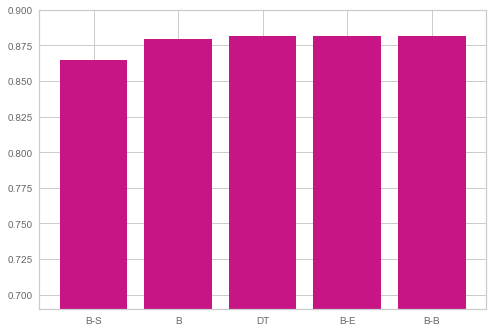

In [195]:
#Display accuracy obtained by the different models built on the test set
accuracies = [Model_DT.score(X_test, y_test), bagging_dt.score(X_test, y_test), bagging_dt_40.score(X_test, y_test), 
              bagging_dt_s.score(X_test, y_test), bagging_dt_b.score(X_test, y_test)]
models = ['DT', 'B', 'B-E', 'B-S', 'B-B']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1], color='#C71585')
plt.xticks(color='dimgray')
plt.yticks(color='dimgray')
plt.ylim(0.69,0.90)
plt.show()

<a class="anchor" id="5.2.">
    
## 5.2. Comparison between Bagging and Random Forests

In [196]:
#Display the accuracy obtained by the different models built on both the test and train sets
accuracies_test = [Model_DT.score(X_test, y_test), bagging_dt.score(X_test, y_test), bagging_dt_40.score(X_test, y_test), 
              bagging_dt_s.score(X_test, y_test), bagging_dt_b.score(X_test, y_test), modelRF.score(X_test, y_test), 
              modelRF_6trees.score(X_test, y_test), modelRF_maxdepth10.score(X_test, y_test), modelRF_leafs4.score(X_test, y_test)]
accuracies_train = [Model_DT.score(X_train, y_train), bagging_dt.score(X_train, y_train), bagging_dt_40.score(X_train, y_train), 
              bagging_dt_s.score(X_train, y_train), bagging_dt_b.score(X_train, y_train), modelRF.score(X_train, y_train), 
              modelRF_6trees.score(X_train, y_train), modelRF_maxdepth10.score(X_train, y_train), modelRF_leafs4.score(X_train, y_train)]
models = ['DT', 'B', 'B-E', 'B-S', 'B-B', 'RF', 'RF-E', 'RF-D', 'RF-L']
data_tuples = list(zip(models,accuracies_test))
data_test = pd.DataFrame(data_tuples)
data_tuples_train = list(zip(models,accuracies_train))
data_train = pd.DataFrame(data_tuples_train)

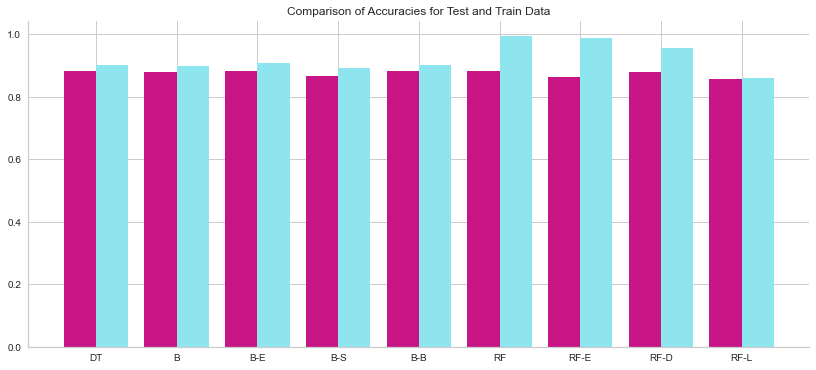

In [197]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(data_test.index - 0.4/2, data_test[1], width=0.4, color='#C71585', label='Test Accuracy')
ax.bar(data_train.index + 0.4/2, data_train[1],  width=0.4, color='#8EE5EE', label='Train Accuracy')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Comparison of Accuracies for Test and Train Data', fontsize=12)
plt.xticks(np.arange(len(models)), models)
plt.show()

<a class="anchor" id="4.8.">
    
## 4.8. XGBoost

In [198]:
!pip install xgboost

In [199]:
X.head(5)

,Year_Birth,Education_Graduation,Education_PhD,Education_Master,Education_Basic,Education_2n Cycle,Marital_Status_Single,Marital_Status_Together,Marital_Status_Married,Marital_Status_Divorced,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,1,0,0,0,0,1,0,0,0,...,10,4,7,0,0,0,0,0,0,0
2174,1954,1,0,0,0,0,1,0,0,0,...,1,2,5,0,0,0,0,0,0,1
4141,1965,1,0,0,0,0,0,1,0,0,...,2,10,4,0,0,0,0,0,0,1
6182,1984,1,0,0,0,0,0,1,0,0,...,0,4,6,0,0,0,0,0,0,1
5324,1981,0,1,0,0,0,0,0,1,0,...,3,6,5,0,0,0,0,0,0,1


In [200]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 5524 to 9405
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Year_Birth               2161 non-null   int64   
 1   Education_Graduation     2161 non-null   int64   
 2   Education_PhD            2161 non-null   int64   
 3   Education_Master         2161 non-null   int64   
 4   Education_Basic          2161 non-null   int64   
 5   Education_2n Cycle       2161 non-null   int64   
 6   Marital_Status_Single    2161 non-null   int64   
 7   Marital_Status_Together  2161 non-null   int64   
 8   Marital_Status_Married   2161 non-null   int64   
 9   Marital_Status_Divorced  2161 non-null   int64   
 10  Marital_Status_Widow     2161 non-null   int64   
 11  Income                   2161 non-null   float64 
 12  Kidhome                  2161 non-null   int64   
 13  Teenhome                 2161 non-null   int64   
 14  Recen

In [201]:
X1 = X.copy()
X.head(3)

,Year_Birth,Education_Graduation,Education_PhD,Education_Master,Education_Basic,Education_2n Cycle,Marital_Status_Single,Marital_Status_Together,Marital_Status_Married,Marital_Status_Divorced,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,1,0,0,0,0,1,0,0,0,...,10,4,7,0,0,0,0,0,0,0
2174,1954,1,0,0,0,0,1,0,0,0,...,1,2,5,0,0,0,0,0,0,1
4141,1965,1,0,0,0,0,0,1,0,0,...,2,10,4,0,0,0,0,0,0,1


In [202]:
#this code is just to test cause of an error message

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(X1['AcceptedCmp3']) #, 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain'])

array([0, 0, 0, ..., 0, 0, 0])

In [203]:
X1['Complain']=X[['Complain']].apply(lambda x: pd.factorize(x)[0])
X1['AcceptedCmp1']=X1[['AcceptedCmp1']].apply(lambda x: pd.factorize(x)[0])
X1['AcceptedCmp2']=X1[['AcceptedCmp2']].apply(lambda x: pd.factorize(x)[0])
X1['AcceptedCmp3']=X1[['AcceptedCmp3']].apply(lambda x: pd.factorize(x)[0])
X1['AcceptedCmp4']=X1[['AcceptedCmp4']].apply(lambda x: pd.factorize(x)[0])
X1['AcceptedCmp5']=X1[['AcceptedCmp5']].apply(lambda x: pd.factorize(x)[0])

In [224]:
y = X1['Response']
X_train, X_test, y_train, y_test = train_test_split(X1, y, stratify=y, test_size=0.25, random_state=123)

In [205]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 5524 to 9405
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2161 non-null   int64  
 1   Education_Graduation     2161 non-null   int64  
 2   Education_PhD            2161 non-null   int64  
 3   Education_Master         2161 non-null   int64  
 4   Education_Basic          2161 non-null   int64  
 5   Education_2n Cycle       2161 non-null   int64  
 6   Marital_Status_Single    2161 non-null   int64  
 7   Marital_Status_Together  2161 non-null   int64  
 8   Marital_Status_Married   2161 non-null   int64  
 9   Marital_Status_Divorced  2161 non-null   int64  
 10  Marital_Status_Widow     2161 non-null   int64  
 11  Income                   2161 non-null   float64
 12  Kidhome                  2161 non-null   int64  
 13  Teenhome                 2161 non-null   int64  
 14  Recency              

In [220]:
#XGBoost here
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
import xgboost as xgb
from typing import Tuple

#XGB6 = XGBClassifier(tree_method="gpu_hist", enable_categorical=True, n_estimators=30, eval_metric='error')
#XGB6.fit(X_train, y_train)

XGB6 = XGBClassifier(n_estimators=300,
                           subsample=0.9,
                           colsample_bytree=0.9,
                           max_depth=3,
                           eval_metric='error',
                           seed=123,
                           scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1],
                           use_label_encoder=False
                           )
XGB6.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

<a class="anchor" id="4.7.1.">
    
### 4.7.1 XGBoost Evaluation

In [221]:
# predict y for X_train and X_test
y_pred_train = XGB6.predict(X_train)
y_pred_test = XGB6.predict(X_test)

In [222]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [227]:
confusion_matrix(y_test,y_pred_test)

array([[ 12,  66],
       [ 56, 407]])

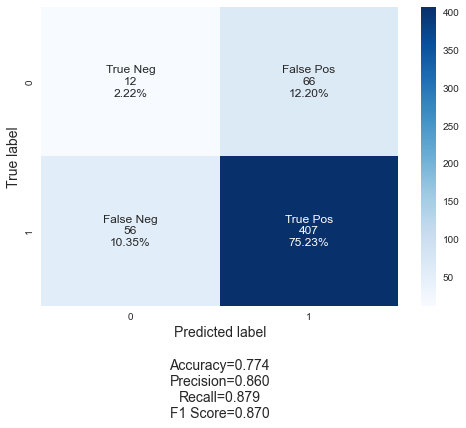

In [228]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [229]:
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.748148,0.774492
1,PRECISION,0.855483,0.860465
2,RECALL,0.849315,0.879050
3,F1 SCORE,0.852388,0.869658
4,AUC,0.497619,0.516448


Counter({1: 1387, 0: 233})


<AxesSubplot:xlabel='Response', ylabel='count'>

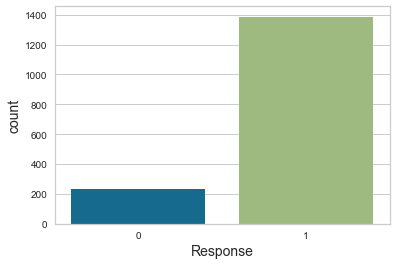

In [230]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train}), ax=ax)

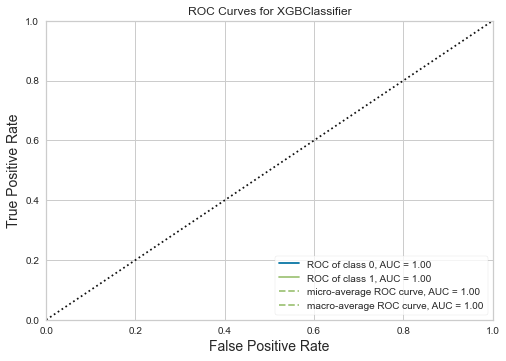

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [231]:
# ROC curve
visualizer = ROCAUC(XGB6, classes=['0','1'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

<a class="anchor" id="6.0.">
    
# 6. Conclusion

After testing several different models as well as various versions of the logistic regression we conclude to keep the random forest model as the best performing version of this classification project to predict the responsiveness of an audience to the respective marketing campaign.

The Random Forest with a perfect score of 1.0 on recall also produces very good results in terms of overall accuracy. We focus on recall as one of the most important metrics since we rather target more people with the campaign (False Positives) than an audience that is too little (False Negatives) for a potential campaign. Whilst targeting rather more people that might in reality not be that responsive, we catch most of the people with a high responsiveness. 
Additionaly, we think it is more important to not miss out on any opportunities than having too little Positives and hence to take too big of a risk to miss out on very responsive and thus potentially profitable customers.


|**Model**|**Recall**||
| :- | :-: | :-: |
|Decision Tree|
|Decision Tree Evaluation|
|Support Vector Machine (SVM)|
|Support Vector Machine (SVM) Evaluation|
|K Neighbors|
|K Neighbors Evaluation|
|Neural Networks Model|
|Neural Networks Model Evaluation|
|Naïve Bayes Model|
|Naïve Bayes Model Evaluation|
|Logistic Regression|
|Logistic Regression Evaluation|
|Logistic Regression with oversampling|
|Logistic Regression with undersampling|
|Random Forest|
